In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,8
import os
import sys
from IPython.display import display_html
from Utilites import display_df
from matplotlib import cm
import scipy.stats as stats
import plotly.express as px


### 1. **DATA COLLECTION**
 -The data has been made publicly available by the Central Pollution Control Board: https://cpcb.nic.in/ which is the official portal of Government of India and we have collected the data for our research.


In [2]:
root_path = os.getcwd()
city_day = pd.read_csv(os.path.join(root_path,'dataset\city_day.csv'))
city_hour = pd.read_csv(os.path.join(root_path,'dataset\city_hour.csv'))
station_day = pd.read_csv(os.path.join(root_path,'dataset\station_day.csv'))
station_hour = pd.read_csv(os.path.join(root_path,'dataset\station_hour.csv'),low_memory=False)
stations = pd.read_csv(os.path.join(root_path,'dataset\stations.csv'))


In [3]:
print('city_day_shape: {}\ncity_hour_shape: {}\nstation_day_shape: {}\nstation_hour_shape: {}\nstations_shape:{}'\
    .format(city_day.shape,city_hour.shape,station_day.shape,station_hour.shape,stations.shape))

city_day_shape: (29531, 16)
city_hour_shape: (707875, 16)
station_day_shape: (108035, 16)
station_hour_shape: (2589083, 16)
stations_shape:(230, 5)


In [4]:
display1 = display_df.mydisplay()  # custom display ultility which prints the output side by side


##### DATASET DESCIPTION
- The dataset contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India.
- Cities
    - Ahmedabad, Aizawl, Amaravati, Amritsar, Bengaluru, Bhopal, Brajrajnagar, Chandigarh, Chennai, Coimbatore, Delhi, Ernakulam, Gurugram, Guwahati, Hyderabad, Jaipur, Jorapokhar, Kochi, Kolkata, Lucknow, Mumbai, Patna, Shillong, Talcher, Thiruvananthapuram, Visakhapatnam


In [5]:
display1.custom_display([city_day.head(),city_hour.head()],['City_day_dataset','City_hours_dataset'])

City_day_dataset City_hours_dataset 
 
 
 City 
 Date 
 PM2.5 
 PM10 
 NO 
 NO2 
 NOx 
 NH3 
 CO 
 SO2 
 O3 
 Benzene 
 Toluene 
 Xylene 
 AQI 
 AQI_Bucket 
 
 
 
 
 Ahmedabad 
 2015-01-01 
 NaN 
 NaN 
 0.92 
 18.22 
 17.15 
 NaN 
 0.92 
 27.64 
 133.36 
 0.00 
 0.02 
 0.00 
 NaN 
 NaN 
 
 
 Ahmedabad 
 2015-01-02 
 NaN 
 NaN 
 0.97 
 15.69 
 16.46 
 NaN 
 0.97 
 24.55 
 34.06 
 3.68 
 5.50 
 3.77 
 NaN 
 NaN 
 
 
 Ahmedabad 
 2015-01-03 
 NaN 
 NaN 
 17.40 
 19.30 
 29.70 
 NaN 
 17.40 
 29.07 
 30.70 
 6.80 
 16.40 
 2.25 
 NaN 
 NaN 
 
 
 Ahmedabad 
 2015-01-04 
 NaN 
 NaN 
 1.70 
 18.48 
 17.97 
 NaN 
 1.70 
 18.59 
 36.08 
 4.43 
 10.14 
 1.00 
 NaN 
 NaN 
 
 
 Ahmedabad 
 2015-01-05 
 NaN 
 NaN 
 22.10 
 21.42 
 37.76 
 NaN 
 22.10 
 39.33 
 39.31 
 7.01 
 18.89 
 2.78 
 NaN 
 NaN 
 
 
 
 
 
 City 
 Datetime 
 PM2.5 
 PM10 
 NO 
 NO2 
 NOx 
 NH3 
 CO 
 SO2 
 O3 
 Benzene 
 Toluene 
 Xylene 
 AQI 
 AQI_Bucket 
 
 
 
 
 Ahmedabad 
 2015-01-01 01:00:00 
 NaN 
 NaN 
 1.00 
 40.01 
 36.37 
 NaN 
 1.00 
 122.07 
 NaN 
 0.0 
 0.0 
 0.0 
 NaN 
 NaN 
 
 
 Ahmedabad 
 2015-01-01 02:00:00 
 NaN 
 NaN 
 0.02 
 27.75 
 19.73 
 NaN 
 0.02 
 85.90 
 NaN 
 0.0 
 0.0 
 0.0 
 NaN 
 NaN 
 
 
 Ahmedabad 
 2015-01-01 03:00:00 
 NaN 
 NaN 
 0.08 
 19.32 
 11.08 
 NaN 
 0.08 
 52.83 
 NaN 
 0.0 
 0.0 
 0.0 
 NaN 
 NaN 
 
 
 Ahmedabad 
 2015-01-01 04:00:00 
 NaN 
 NaN 
 0.30 
 16.45 
 9.20 
 NaN 
 0.30 
 39.53 
 153.58 
 0.0 
 0.0 
 0.0 
 NaN 
 NaN 
 
 
 Ahmedabad 
 2015-01-01 05:00:00 
 NaN 
 NaN 
 0.12 
 14.90 
 7.85 
 NaN 
 0.12 
 32.63 
 NaN 
 0.0 
 0.0 
 0.0 
 NaN 
 NaN

In [6]:
display1.custom_display([station_day.head(),station_hour.head(),stations.head()],['station_day_dataset','station_hour_dataset','Stations_dataset'])

station_day_dataset station_hour_dataset Stations_dataset 
 
 
 StationId 
 Date 
 PM2.5 
 PM10 
 NO 
 NO2 
 NOx 
 NH3 
 CO 
 SO2 
 O3 
 Benzene 
 Toluene 
 Xylene 
 AQI 
 AQI_Bucket 
 
 
 
 
 AP001 
 2017-11-24 
 71.36 
 115.75 
 1.75 
 20.65 
 12.40 
 12.19 
 0.10 
 10.76 
 109.26 
 0.17 
 5.92 
 0.10 
 NaN 
 NaN 
 
 
 AP001 
 2017-11-25 
 81.40 
 124.50 
 1.44 
 20.50 
 12.08 
 10.72 
 0.12 
 15.24 
 127.09 
 0.20 
 6.50 
 0.06 
 184.0 
 Moderate 
 
 
 AP001 
 2017-11-26 
 78.32 
 129.06 
 1.26 
 26.00 
 14.85 
 10.28 
 0.14 
 26.96 
 117.44 
 0.22 
 7.95 
 0.08 
 197.0 
 Moderate 
 
 
 AP001 
 2017-11-27 
 88.76 
 135.32 
 6.60 
 30.85 
 21.77 
 12.91 
 0.11 
 33.59 
 111.81 
 0.29 
 7.63 
 0.12 
 198.0 
 Moderate 
 
 
 AP001 
 2017-11-28 
 64.18 
 104.09 
 2.56 
 28.07 
 17.01 
 11.42 
 0.09 
 19.00 
 138.18 
 0.17 
 5.02 
 0.07 
 188.0 
 Moderate 
 
 
 
 
 
 StationId 
 Datetime 
 PM2.5 
 PM10 
 NO 
 NO2 
 NOx 
 NH3 
 CO 
 SO2 
 O3 
 Benzene 
 Toluene 
 Xylene 
 AQI 
 AQI_Bucket 
 
 
 
 
 AP001 
 2017-11-24 17:00:00 
 60.50 
 98.00 
 2.35 
 30.80 
 18.25 
 8.50 
 0.1 
 11.85 
 126.40 
 0.1 
 6.10 
 0.10 
 NaN 
 NaN 
 
 
 AP001 
 2017-11-24 18:00:00 
 65.50 
 111.25 
 2.70 
 24.20 
 15.07 
 9.77 
 0.1 
 13.17 
 117.12 
 0.1 
 6.25 
 0.15 
 NaN 
 NaN 
 
 
 AP001 
 2017-11-24 19:00:00 
 80.00 
 132.00 
 2.10 
 25.18 
 15.15 
 12.02 
 0.1 
 12.08 
 98.98 
 0.2 
 5.98 
 0.18 
 NaN 
 NaN 
 
 
 AP001 
 2017-11-24 20:00:00 
 81.50 
 133.25 
 1.95 
 16.25 
 10.23 
 11.58 
 0.1 
 10.47 
 112.20 
 0.2 
 6.72 
 0.10 
 NaN 
 NaN 
 
 
 AP001 
 2017-11-24 21:00:00 
 75.25 
 116.00 
 1.43 
 17.48 
 10.43 
 12.03 
 0.1 
 9.12 
 106.35 
 0.2 
 5.75 
 0.08 
 NaN 
 NaN 
 
 
 
 
 
 StationId 
 StationName 
 City 
 State 
 Status 
 
 
 
 
 AP001 
 Secretariat, Amaravati - APPCB 
 Amaravati 
 Andhra Pradesh 
 Active 
 
 
 AP002 
 Anand Kala Kshetram, Rajamahendravaram - APPCB 
 Rajamahendravaram 
 Andhra Pradesh 
 NaN 
 
 
 AP003 
 Tirumala, Tirupati - APPCB 
 Tirupati 
 Andhra Pradesh 
 NaN 
 
 
 AP004 
 PWD Grounds, Vijayawada - APPCB 
 Vijayawada 
 Andhra Pradesh 
 NaN 
 
 
 AP005 
 GVM Corporation, Visakhapatnam - APPCB 
 Visakhapatnam 
 Andhra Pradesh 
 Active

### Generating Dataset Reports (Unprocessed dataset)
 - location : \Dataset_reports
 - report contains all the preliminary information about the indiduval dataset.
    - Dataset description (overview)
    - Descriptive stats of Variables present in the dataset
    - Interactions between Variables (basic correlation)
    - Correlations (Spearman's ,Pearson's, Kendall'sT, Cramer'sV and Phik's correlations measures are calculated and represented them using appropriate heatmap graphs)
    - Sample of each Dataset (sample.head() and sample.tail())

In [7]:
"""city_day_prof = ProfileReport(city_day)
city_hour_prof = ProfileReport(city_hour)
station_day_prof = ProfileReport(station_day)
station_hour_prof = ProfileReport(station_hour)
stations_prof = ProfileReport(stations)
"""

'city_day_prof = ProfileReport(city_day)\ncity_hour_prof = ProfileReport(city_hour)\nstation_day_prof = ProfileReport(station_day)\nstation_hour_prof = ProfileReport(station_hour)\nstations_prof = ProfileReport(stations)\n'

In [8]:
"""city_day_prof.to_file(output_file='Dataset_reports\city_day_prof.html')
city_hour_prof.to_file(output_file='Dataset_reports\city_hour_prof.html')
station_day_prof.to_file(output_file='Dataset_reports\station_day_prof.html')
station_hour_prof.to_file(output_file='Dataset_reports\station_hour_prof.html')
stations_prof.to_file(output_file='Dataset_reports\stations_prof.html')"""

"city_day_prof.to_file(output_file='Dataset_reports\\city_day_prof.html')\ncity_hour_prof.to_file(output_file='Dataset_reports\\city_hour_prof.html')\nstation_day_prof.to_file(output_file='Dataset_reports\\station_day_prof.html')\nstation_hour_prof.to_file(output_file='Dataset_reports\\station_hour_prof.html')\nstations_prof.to_file(output_file='Dataset_reports\\stations_prof.html')"

### 2. **Data cleaning and manipulation**
* **Missing value treatment/ imputation** : *This is a standard statistical imputing constant, using KNN imputation.*

* **Anamoly/ outlier detection** : *You can accomplish this by using Isolation Forest, One-Class SVM, and/or Local Outlier Factor outlier detection algorithms*

* **Cleaning techniques from X variable family**: *In this instance, you want to apply custom functions, remove duplicates, as well as replace crucial values.*

* **Cleaning Techniques of the Y-Variable sort**: *Here it is important to do label encoding, one-hot encoding, as well as dictionary mapping.*

* **’DataFrames’ need to be merged**: *This step includes concatenating, merging, and joining.*

* **‘parsing dates'**: *Here you need to use auto-format detecting strings to accomplish ‘DateTime’ converting, including changing ‘DateTime’ objects to numbers*

In [9]:
from Utilites.missing_impute import Identifier
identifier = Identifier()

In [10]:
city_day_data = identifier.check_missing_values(city_day)
city_hour_data = identifier.check_missing_values(city_hour)
station_day_data = identifier.check_missing_values(station_day)
station_hour_data = identifier.check_missing_values(station_hour)
stations_data = identifier.check_missing_values(stations)

The passed instance is Dataframe
Identifying missing values
The total number of Missing values present is :88488
The passed instance is Dataframe
Identifying missing values
The total number of Missing values present is :2515685
The passed instance is Dataframe
Identifying missing values
The total number of Missing values present is :422673
The passed instance is Dataframe
Identifying missing values
The total number of Missing values present is :11664492
The passed instance is Dataframe
Identifying missing values
The total number of Missing values present is :97


In [11]:
display1.custom_display([city_day_data.reset_index(),\
                            city_hour_data.reset_index(),\
                                station_day_data.reset_index(),\
                                    station_hour_data.reset_index(),\
                                        stations_data.reset_index()],['city_day_data','city_hour_data',\
                                                                    'station_day_data','station_hour_data','stations_data'])

city_day_data city_hour_data station_day_data station_hour_data stations_data 
 
 
 index 
 count 
 
 
 
 
 City 
 0 
 
 
 Date 
 0 
 
 
 PM2.5 
 4598 
 
 
 PM10 
 11140 
 
 
 NO 
 3582 
 
 
 NO2 
 3585 
 
 
 NOx 
 4185 
 
 
 NH3 
 10328 
 
 
 CO 
 2059 
 
 
 SO2 
 3854 
 
 
 O3 
 4022 
 
 
 Benzene 
 5623 
 
 
 Toluene 
 8041 
 
 
 Xylene 
 18109 
 
 
 AQI 
 4681 
 
 
 AQI_Bucket 
 4681 
 
 
 
 
 
 index 
 count 
 
 
 
 
 City 
 0 
 
 
 Datetime 
 0 
 
 
 PM2.5 
 145088 
 
 
 PM10 
 296737 
 
 
 NO 
 116632 
 
 
 NO2 
 117122 
 
 
 NOx 
 123224 
 
 
 NH3 
 272542 
 
 
 CO 
 86517 
 
 
 SO2 
 130373 
 
 
 O3 
 129208 
 
 
 Benzene 
 163646 
 
 
 Toluene 
 220607 
 
 
 Xylene 
 455829 
 
 
 AQI 
 129080 
 
 
 AQI_Bucket 
 129080 
 
 
 
 
 
 index 
 count 
 
 
 
 
 StationId 
 0 
 
 
 Date 
 0 
 
 
 PM2.5 
 21625 
 
 
 PM10 
 42706 
 
 
 NO 
 17106 
 
 
 NO2 
 16547 
 
 
 NOx 
 15500 
 
 
 NH3 
 48105 
 
 
 CO 
 12998 
 
 
 SO2 
 25204 
 
 
 O3 
 25568 
 
 
 Benzene 
 31455 
 
 
 Toluene 
 38702 
 
 
 Xylene 
 85137 
 
 
 AQI 
 21010 
 
 
 AQI_Bucket 
 21010 
 
 
 
 
 
 index 
 count 
 
 
 
 
 StationId 
 0 
 
 
 Datetime 
 0 
 
 
 PM2.5 
 647689 
 
 
 PM10 
 1119252 
 
 
 NO 
 553711 
 
 
 NO2 
 528973 
 
 
 NOx 
 490808 
 
 
 NH3 
 1236618 
 
 
 CO 
 499302 
 
 
 SO2 
 742737 
 
 
 O3 
 725973 
 
 
 Benzene 
 861579 
 
 
 Toluene 
 1042366 
 
 
 Xylene 
 2075104 
 
 
 AQI 
 570190 
 
 
 AQI_Bucket 
 570190 
 
 
 
 
 
 index 
 count 
 
 
 
 
 StationId 
 0 
 
 
 StationName 
 0 
 
 
 City 
 0 
 
 
 State 
 0 
 
 
 Status 
 97

### Formula to calculate the Ratio of missing values
<img src="useful formulae\formula.PNG" width="800" height="100">

In [12]:
missing_percentage_calc = Identifier()

In [13]:
city_day_percent = missing_percentage_calc.compute_missing_percentage(city_day)
city_hour_percent = missing_percentage_calc.compute_missing_percentage(city_hour)
station_day_percent = missing_percentage_calc.compute_missing_percentage(station_day)
station_hour_percent = missing_percentage_calc.compute_missing_percentage(station_hour)
stations_percent = missing_percentage_calc.compute_missing_percentage(stations)

The passed instance is Dataframe
Identifying missing values percentage
computed percentage
The passed instance is Dataframe
Identifying missing values percentage
computed percentage
The passed instance is Dataframe
Identifying missing values percentage
computed percentage
The passed instance is Dataframe
Identifying missing values percentage
computed percentage
The passed instance is Dataframe
Identifying missing values percentage
computed percentage


In [14]:
display1.custom_display([city_day_percent.reset_index(),\
                            city_hour_percent.reset_index(),\
                                station_day_percent.reset_index(),\
                                    station_hour_percent.reset_index(),\
                                        stations_percent.reset_index()],['city_day_data','city_hour_data',\
                                                                    'station_day_data','station_hour_data','stations_data'])

city_day_data city_hour_data station_day_data station_hour_data stations_data 
 
 
 index 
 Missing_percentage 
 
 
 
 
 City 
 0.000000 
 
 
 Date 
 0.000000 
 
 
 PM2.5 
 15.570079 
 
 
 PM10 
 37.723071 
 
 
 NO 
 12.129626 
 
 
 NO2 
 12.139785 
 
 
 NOx 
 14.171549 
 
 
 NH3 
 34.973418 
 
 
 CO 
 6.972334 
 
 
 SO2 
 13.050692 
 
 
 O3 
 13.619586 
 
 
 Benzene 
 19.041008 
 
 
 Toluene 
 27.229014 
 
 
 Xylene 
 61.322001 
 
 
 AQI 
 15.851139 
 
 
 AQI_Bucket 
 15.851139 
 
 
 
 
 
 index 
 Missing_percentage 
 
 
 
 
 City 
 0.000000 
 
 
 Datetime 
 0.000000 
 
 
 PM2.5 
 20.496274 
 
 
 PM10 
 41.919407 
 
 
 NO 
 16.476355 
 
 
 NO2 
 16.545577 
 
 
 NOx 
 17.407593 
 
 
 NH3 
 38.501430 
 
 
 CO 
 12.222073 
 
 
 SO2 
 18.417517 
 
 
 O3 
 18.252940 
 
 
 Benzene 
 23.117923 
 
 
 Toluene 
 31.164683 
 
 
 Xylene 
 64.393996 
 
 
 AQI 
 18.234858 
 
 
 AQI_Bucket 
 18.234858 
 
 
 
 
 
 index 
 Missing_percentage 
 
 
 
 
 StationId 
 0.000000 
 
 
 Date 
 0.000000 
 
 
 PM2.5 
 20.016661 
 
 
 PM10 
 39.529782 
 
 
 NO 
 15.833758 
 
 
 NO2 
 15.316333 
 
 
 NOx 
 14.347202 
 
 
 NH3 
 44.527237 
 
 
 CO 
 12.031286 
 
 
 SO2 
 23.329477 
 
 
 O3 
 23.666404 
 
 
 Benzene 
 29.115564 
 
 
 Toluene 
 35.823576 
 
 
 Xylene 
 78.805017 
 
 
 AQI 
 19.447401 
 
 
 AQI_Bucket 
 19.447401 
 
 
 
 
 
 index 
 Missing_percentage 
 
 
 
 
 StationId 
 0.000000 
 
 
 Datetime 
 0.000000 
 
 
 PM2.5 
 25.016154 
 
 
 PM10 
 43.229669 
 
 
 NO 
 21.386375 
 
 
 NO2 
 20.430902 
 
 
 NOx 
 18.956828 
 
 
 NH3 
 47.762779 
 
 
 CO 
 19.284897 
 
 
 SO2 
 28.687261 
 
 
 O3 
 28.039773 
 
 
 Benzene 
 33.277380 
 
 
 Toluene 
 40.260046 
 
 
 Xylene 
 80.148222 
 
 
 AQI 
 22.022855 
 
 
 AQI_Bucket 
 22.022855 
 
 
 
 
 
 index 
 Missing_percentage 
 
 
 
 
 StationId 
 0.000000 
 
 
 StationName 
 0.000000 
 
 
 City 
 0.000000 
 
 
 State 
 0.000000 
 
 
 Status 
 42.173913

### Ploting heatmap graph to visualize and reconfirm the missing values presence across all the datasets


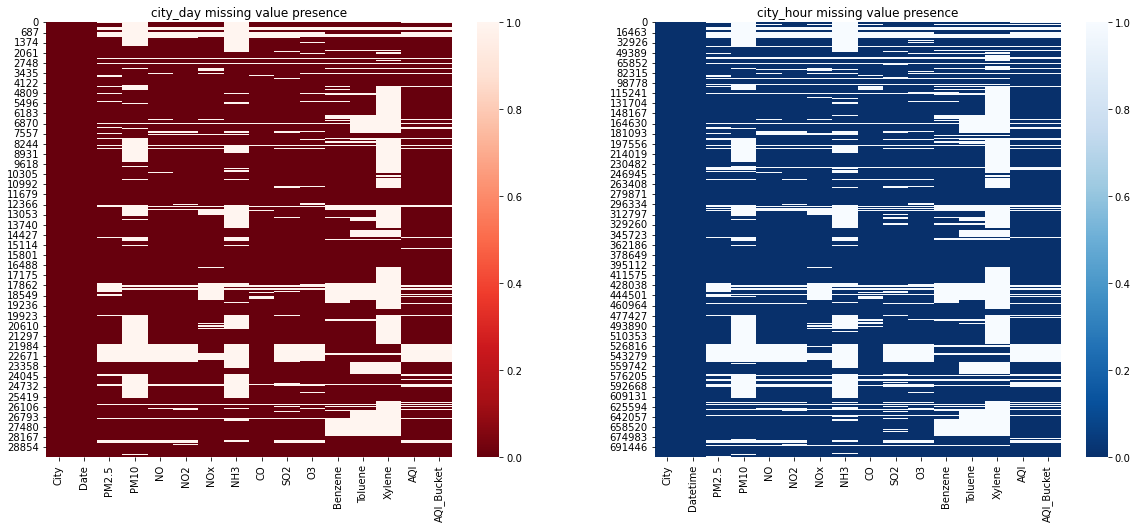

In [27]:
fig=  plt.figure(figsize=(20,8))
plt.subplot(121)
plt.title("city_day missing value presence")
sb.heatmap(city_day.isnull(), cmap = 'Reds_r')
plt.subplot(122)
plt.title("city_hour missing value presence")
sb.heatmap(city_hour.isnull(), cmap = 'Blues_r')
plt.savefig(root_path+"\graphs\heatmaps_missing_Values\city_dataset.png")
plt.show()


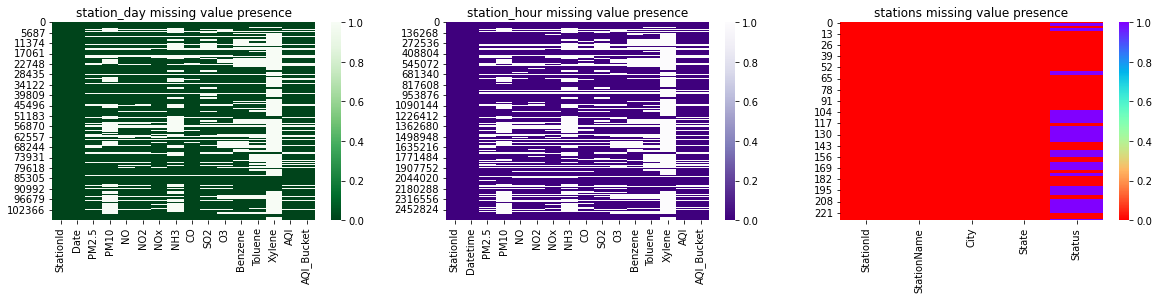

In [28]:
plt.figure(figsize=(20,8))
plt.subplot(2, 3, 1)
plt.title("station_day missing value presence")
sb.heatmap(station_day.isnull(), cmap = 'Greens_r')
plt.subplot(2, 3, 2)
plt.title("station_hour missing value presence")
sb.heatmap(station_hour.isnull(), cmap = 'Purples_r')
plt.subplot(2, 3, 3)
plt.title("stations missing value presence")
sb.heatmap(stations.isnull(), cmap = 'rainbow_r')
plt.savefig(root_path+"\graphs\heatmaps_missing_Values\Stations_dataset.png")
plt.show()


### Treating the Missing Values present in the dataset using KNN imputor
 -Distance calculation in the presence of missing values
 - <img src="useful formulae\KNN_imputer.PNG" width="800" height="200">
 

In [39]:
imputer = Identifier()

In [25]:
#Imputing missing values for city_data dataset
Imputed_city_day = imputer.missing_value_treatment(city_day)


Missing: 0


In [26]:
city_day_new = pd.DataFrame(Imputed_city_day,columns=[city_day.columns[2:15]])
city_day_new['City']  = city_day['City']
city_day_new['Date'] = city_day['Date']
city_day_new['AQI_Bucket'] =city_day['AQI_Bucket'].fillna(method='backfill')
city_day_new.to_csv(root_path+'\dataset\city_day_new.csv')

### Sub-sampling the dataset by choosing particular cities
    - chennai and Coimbatore records are sampled for our analysis

In [27]:
#Imputing missing values for city_hour dataset
city_hour_sampled = city_hour[city_hour['City'].isin(["Chennai",'Coimbatore'])]
city_hour_sampled = city_hour_sampled.reset_index().drop('index',axis=1)


In [28]:
city_hour_sampled_values = city_hour_sampled.values
ix = [i for i in range(city_hour_sampled_values.shape[1]) if i != 0 and i!=1 and i!=15]
X, y = city_hour_sampled_values[:, ix], city_hour_sampled_values[:, 15]


In [29]:
imputer = KNNImputer()
imputer.fit(X)
Xtrans = imputer.transform(X)

In [30]:
city_hour_imputed = pd.DataFrame(Xtrans)


In [31]:
city_hour_imputed.insert(loc=0,column='PM2.5',value=pd.DataFrame(Xtrans)[0]+np.random.randint(0,10))

In [32]:
city_hour_imputed.columns = city_hour_sampled.columns[2:-1]


In [33]:
city_hour_imputed.insert(loc=0,column='City',value=city_hour_sampled['City'])
city_hour_imputed.insert(loc=1,column='Datetime',value=city_hour_sampled['Datetime'])

In [34]:
city_hour_imputed.to_csv(root_path+'\Dataset\city_hour_new.csv')

In [35]:
station_day_sampled = station_day[station_day['StationId'].isin(['TN005',"TN001"])]
station_hour_sampled = station_hour[station_hour['StationId'].isin(['TN005',"TN001"])]
display1.custom_display([station_day_sampled.head(),station_hour_sampled.head()],['station_day_sampled','station_hour_sampled'])

station_day_sampled station_hour_sampled 
 
 
 StationId 
 Date 
 PM2.5 
 PM10 
 NO 
 NO2 
 NOx 
 NH3 
 CO 
 SO2 
 O3 
 Benzene 
 Toluene 
 Xylene 
 AQI 
 AQI_Bucket 
 
 
 
 
 TN001 
 2015-01-01 
 NaN 
 NaN 
 8.81 
 12.54 
 20.63 
 NaN 
 1.60 
 7.61 
 3.86 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 TN001 
 2015-01-02 
 NaN 
 NaN 
 8.71 
 12.60 
 20.59 
 NaN 
 1.55 
 7.53 
 3.82 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 TN001 
 2015-01-03 
 NaN 
 NaN 
 8.90 
 12.80 
 20.82 
 NaN 
 1.48 
 7.69 
 3.90 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 TN001 
 2015-01-04 
 NaN 
 NaN 
 8.69 
 12.45 
 20.50 
 NaN 
 1.60 
 7.51 
 3.80 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 TN001 
 2015-01-05 
 NaN 
 NaN 
 8.74 
 12.59 
 20.61 
 NaN 
 1.38 
 7.56 
 3.83 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 
 
 
 StationId 
 Datetime 
 PM2.5 
 PM10 
 NO 
 NO2 
 NOx 
 NH3 
 CO 
 SO2 
 O3 
 Benzene 
 Toluene 
 Xylene 
 AQI 
 AQI_Bucket 
 
 
 
 
 TN001 
 2015-01-01 01:00:00 
 NaN 
 NaN 
 8.85 
 12.91 
 20.85 
 NaN 
 1.25 
 7.65 
 3.88 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 TN001 
 2015-01-01 02:00:00 
 NaN 
 NaN 
 8.36 
 12.27 
 20.17 
 NaN 
 1.38 
 7.23 
 3.66 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 TN001 
 2015-01-01 03:00:00 
 NaN 
 NaN 
 8.92 
 12.52 
 20.70 
 NaN 
 1.21 
 7.71 
 3.91 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 TN001 
 2015-01-01 04:00:00 
 NaN 
 NaN 
 8.69 
 12.36 
 20.46 
 NaN 
 1.15 
 7.51 
 3.81 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 TN001 
 2015-01-01 05:00:00 
 NaN 
 NaN 
 8.76 
 12.14 
 20.41 
 NaN 
 1.44 
 7.58 
 3.84 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN

In [36]:
station_day_sampled = station_day_sampled.reset_index().drop('index',axis=1)
station_hour_sampled = station_hour_sampled.reset_index().drop('index',axis=1)

In [37]:
idi = station_day_sampled['StationId']
date = station_day_sampled['Date']

In [40]:
#Imputing missing values for station_day dataset
Imputed_station_day= imputer.missing_value_treatment(station_day_sampled)


Missing: 0


In [41]:
station_day_imputed = pd.DataFrame(Imputed_station_day)
station_day_imputed.insert(loc=0,column='PM2.5',value=city_day_new['PM2.5'][:2395])
station_day_imputed.columns = station_hour.columns[2:-1]
station_day_imputed.insert(loc=0,column='StationId',value=idi)
station_day_imputed.insert(loc=1,column='Date',value=date)

In [42]:
station_day_imputed.to_csv(root_path+"\Dataset\station_day_new.csv")


In [43]:
#Imputing missing values for station_hour dataset
Imputed_station_hour=  missing_value_treatment(station_hour_sampled)

Missing: 0


In [44]:
station_hour_imputed = pd.DataFrame(Imputed_station_hour)

In [45]:
id_s = station_hour_sampled['StationId']
date_s = station_hour_sampled['Datetime']

In [46]:
station_hour_imputed.insert(loc=0,column='PM2.5',value=pd.DataFrame(Xtrans)[0])
station_hour_imputed.columns = station_hour.columns[2:-1]
station_hour_imputed.insert(loc=0,column='StationId',value=id_s)
station_hour_imputed.insert(loc=1,column='Datetime',value=date_s)


In [47]:
station_hour_imputed.to_csv(root_path+'\Dataset\station_hour_new.csv')

In [48]:
#Date parsing for exploratory analysis using pandas.DateTime function
#To speed up the datetime parsing, set infer_datetime_format =True
from Utilites.Date_time_parser import Datetime
mydate = Datetime()


In [49]:
datime_parsed_c = mydate.date_time_parser(city_hour_imputed['Datetime'])
datime_parsed_s = mydate.date_time_parser(station_hour_imputed['Datetime'])

In [50]:
city_hour_imputed.drop('Datetime',axis=1,inplace=True)
city_hour_imputed.insert(loc=1,column='Date',value=datime_parsed_c[0])
city_hour_imputed.insert(loc=2,column='time',value=datime_parsed_c[1])

In [51]:
station_hour_imputed.drop('Datetime',axis=1,inplace=True)
station_hour_imputed.insert(loc=1,column='Date',value=datime_parsed_s[0])
station_hour_imputed.insert(loc=2,column='time',value=datime_parsed_s[1])

In [52]:
display1.custom_display([city_hour_imputed.head(),station_hour_imputed.head()],['city_hour_imputed','station_hour_imputed'])

city_hour_imputed station_hour_imputed 
 
 
 City 
 Date 
 time 
 PM2.5 
 PM10 
 NO 
 NO2 
 NOx 
 NH3 
 CO 
 SO2 
 O3 
 Benzene 
 Toluene 
 Xylene 
 AQI 
 
 
 
 
 Chennai 
 2015-01-01 
 01:00:00 
 48.046 
 44.046 
 30.156 
 41.56 
 47.97 
 57.25 
 6.36 
 0.92 
 7.19 
 7.65 
 0.11 
 0.0 
 98.8 
 
 
 Chennai 
 2015-01-01 
 02:00:00 
 44.008 
 40.008 
 26.946 
 15.29 
 12.31 
 20.94 
 4.93 
 0.77 
 8.03 
 10.96 
 0.17 
 0.0 
 57.0 
 
 
 Chennai 
 2015-01-01 
 03:00:00 
 66.596 
 62.596 
 30.100 
 14.49 
 13.72 
 19.29 
 3.92 
 1.06 
 10.53 
 12.14 
 0.19 
 0.0 
 59.6 
 
 
 Chennai 
 2015-01-01 
 04:00:00 
 78.306 
 74.306 
 41.008 
 14.23 
 14.45 
 18.89 
 4.54 
 1.54 
 10.04 
 11.95 
 0.18 
 0.0 
 80.4 
 
 
 Chennai 
 2015-01-01 
 05:00:00 
 35.982 
 31.982 
 19.718 
 13.62 
 20.16 
 18.40 
 4.85 
 1.03 
 9.19 
 11.64 
 0.18 
 0.0 
 100.4 
 
 
 
 
 
 StationId 
 Date 
 time 
 PM2.5 
 PM10 
 NO 
 NO2 
 NOx 
 NH3 
 CO 
 SO2 
 O3 
 Benzene 
 Toluene 
 Xylene 
 AQI 
 
 
 
 
 TN001 
 2015-01-01 
 01:00:00 
 44.046 
 33.030 
 32.288 
 8.85 
 12.91 
 20.85 
 6.184 
 1.25 
 7.65 
 3.88 
 7.658 
 4.064 
 80.0 
 
 
 TN001 
 2015-01-01 
 02:00:00 
 40.008 
 41.740 
 35.302 
 8.36 
 12.27 
 20.17 
 5.502 
 1.38 
 7.23 
 3.66 
 7.658 
 4.064 
 69.6 
 
 
 TN001 
 2015-01-01 
 03:00:00 
 62.596 
 33.030 
 35.414 
 8.92 
 12.52 
 20.70 
 3.312 
 1.21 
 7.71 
 3.91 
 7.658 
 4.064 
 80.0 
 
 
 TN001 
 2015-01-01 
 04:00:00 
 74.306 
 50.422 
 35.302 
 8.69 
 12.36 
 20.46 
 6.578 
 1.15 
 7.51 
 3.81 
 7.658 
 4.064 
 83.8 
 
 
 TN001 
 2015-01-01 
 05:00:00 
 31.982 
 33.816 
 32.122 
 8.76 
 12.14 
 20.41 
 3.402 
 1.44 
 7.58 
 3.84 
 12.404 
 4.064 
 93.6

In [53]:
city_day_new.to_csv(root_path+'\Dataset\cleaned\city_day_new.csv')
city_hour_imputed.to_csv(root_path+'\Dataset\cleaned\city_hour_new.csv')
station_day_imputed.to_csv(root_path+'\Dataset\cleaned\station_day_new.csv')
station_hour_imputed.to_csv(root_path+'\Dataset\cleaned\station_hour_new.csv')

### Descriptive and exploratory data analysis
- Outlier Detection - (Statistical and visual method)
- Distribution plots (histogram,distplot,kdeplots)
- Data Exploration - (basic exploration and data visualization)
- Normailzation and Encoding (if neccessary)
- Hypothesis testing

### Outlier/ Anamoly detection and Treatment using statistical method

- Using the Interquartile Rule to Find Outliers
- Though it's not often affected much by them, the interquartile range can be used to detect outliers. This is done using these steps:
    - Calculate the interquartile range for the data.
    - Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).
    - Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
    - Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.
    - 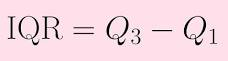

In [410]:
root_path = os.getcwd()
city_day_new = pd.read_csv(root_path+'\Dataset\cleaned\city_day_new.csv')
city_hour_new = pd.read_csv(root_path+'\Dataset\cleaned\city_hour_new.csv')
station_day_new = pd.read_csv(root_path+'\Dataset\cleaned\station_day_new.csv')
station_hour_new = pd.read_csv(root_path+'\Dataset\cleaned\station_hour_new.csv')

In [411]:
city_day_new = city_day_new.drop('Unnamed: 0',axis=1)
city_hour_new = city_hour_new.drop('Unnamed: 0',axis=1)
station_day_new = station_day_new.drop('Unnamed: 0',axis=1)
station_hour_new = station_hour_new.drop('Unnamed: 0',axis=1)

In [412]:
#Outlier Treatment using statistical method
# below given module contains the logic for detecting as well as treating the outliers from the dataset
from Utilites.outlier import outlier_detect
import datetime as dt
out1= outlier_detect()

In [413]:
city_result,city_hour_result = out1.outlier_remove(city_day_new),out1.outlier_remove(city_hour_new)

In [414]:
display1.custom_display([city_result.head(),city_hour_result.head()],['city_day_without_outliers','city_hour_without outlier'])

city_day_without_outliers city_hour_without outlier 
 
 
 PM2.5 
 PM10 
 NO 
 NO2 
 NOx 
 NH3 
 CO 
 SO2 
 O3 
 Benzene 
 Toluene 
 Xylene 
 AQI 
 City 
 Date 
 AQI_Bucket 
 
 
 
 
 23.178 
 126.112 
 0.92 
 18.22 
 17.15 
 10.294 
 0.92 
 27.64 
 30.79 
 0.00 
 0.02 
 0.00 
 122.4 
 Ahmedabad 
 2015-01-01 
 Poor 
 
 
 24.736 
 123.518 
 0.97 
 15.69 
 16.46 
 10.366 
 0.97 
 24.55 
 34.06 
 3.68 
 5.50 
 0.06 
 124.2 
 Ahmedabad 
 2015-01-02 
 Poor 
 
 
 121.276 
 161.864 
 17.40 
 19.30 
 29.70 
 8.950 
 0.92 
 29.07 
 30.70 
 6.80 
 16.40 
 2.25 
 121.0 
 Ahmedabad 
 2015-01-03 
 Poor 
 
 
 40.686 
 159.470 
 1.70 
 18.48 
 17.97 
 12.088 
 1.70 
 18.59 
 36.08 
 4.43 
 10.14 
 1.00 
 136.6 
 Ahmedabad 
 2015-01-04 
 Poor 
 
 
 51.520 
 215.888 
 22.10 
 21.42 
 37.76 
 9.036 
 0.92 
 9.73 
 39.31 
 7.01 
 18.89 
 2.78 
 121.0 
 Ahmedabad 
 2015-01-05 
 Poor 
 
 
 
 
 
 City 
 Date 
 time 
 PM2.5 
 PM10 
 NO 
 NO2 
 NOx 
 NH3 
 CO 
 SO2 
 O3 
 Benzene 
 Toluene 
 Xylene 
 AQI 
 
 
 
 
 Chennai 
 2015-01-01 
 01:00:00 
 48.046 
 44.046 
 30.156 
 7.08 
 15.34 
 16.80 
 6.36 
 0.92 
 7.19 
 7.65 
 0.11 
 0.0 
 98.8 
 
 
 Chennai 
 2015-01-01 
 02:00:00 
 44.008 
 40.008 
 26.946 
 15.29 
 12.31 
 20.94 
 4.93 
 0.77 
 8.03 
 10.96 
 0.17 
 0.0 
 57.0 
 
 
 Chennai 
 2015-01-01 
 03:00:00 
 66.596 
 62.596 
 30.100 
 14.49 
 13.72 
 19.29 
 3.92 
 1.06 
 10.53 
 12.14 
 0.19 
 0.0 
 59.6 
 
 
 Chennai 
 2015-01-01 
 04:00:00 
 78.306 
 74.306 
 41.008 
 14.23 
 14.45 
 18.89 
 4.54 
 1.54 
 10.04 
 11.95 
 0.18 
 0.0 
 80.4 
 
 
 Chennai 
 2015-01-01 
 05:00:00 
 35.982 
 31.982 
 19.718 
 13.62 
 20.16 
 18.40 
 4.85 
 1.03 
 9.19 
 11.64 
 0.18 
 0.0 
 100.4

In [415]:
station_day_result,station_hour_result = out1.outlier_remove(station_day_new),out1.outlier_remove(station_hour_new)

In [416]:
display1.custom_display([station_day_result.head(),station_hour_result.head()],['station_day_without_outliers','station_hour_without_outliers'])

station_day_without_outliers station_hour_without_outliers 
 
 
 StationId 
 Date 
 PM2.5 
 PM10 
 NO 
 NO2 
 NOx 
 NH3 
 CO 
 SO2 
 O3 
 Benzene 
 Toluene 
 Xylene 
 AQI 
 
 
 
 
 TN001 
 2015-01-01 
 23.178 
 44.186 
 33.806 
 8.81 
 12.54 
 20.63 
 20.916 
 1.60 
 7.61 
 3.86 
 0.166 
 0.248 
 94.6 
 
 
 TN001 
 2015-01-02 
 24.736 
 44.186 
 33.806 
 8.71 
 12.60 
 20.59 
 20.916 
 1.55 
 7.53 
 3.82 
 0.166 
 0.248 
 94.6 
 
 
 TN001 
 2015-01-03 
 121.276 
 44.186 
 33.806 
 8.90 
 12.80 
 20.82 
 20.916 
 1.48 
 7.69 
 3.90 
 0.166 
 0.270 
 94.6 
 
 
 TN001 
 2015-01-04 
 40.686 
 44.186 
 33.806 
 8.69 
 12.45 
 20.50 
 20.916 
 1.60 
 7.51 
 3.80 
 0.166 
 0.248 
 94.6 
 
 
 TN001 
 2015-01-05 
 60.380 
 44.186 
 33.806 
 8.74 
 12.59 
 20.61 
 20.916 
 1.38 
 7.56 
 3.83 
 0.166 
 0.248 
 94.6 
 
 
 
 
 
 StationId 
 Date 
 time 
 PM2.5 
 PM10 
 NO 
 NO2 
 NOx 
 NH3 
 CO 
 SO2 
 O3 
 Benzene 
 Toluene 
 Xylene 
 AQI 
 
 
 
 
 TN001 
 2015-01-01 
 01:00:00 
 44.046 
 33.030 
 32.288 
 8.85 
 12.91 
 20.85 
 6.184 
 1.25 
 7.65 
 3.88 
 0.0 
 0.0 
 80.0 
 
 
 TN001 
 2015-01-01 
 02:00:00 
 40.008 
 41.740 
 35.302 
 8.36 
 12.27 
 20.17 
 5.502 
 1.38 
 7.23 
 3.66 
 0.0 
 0.0 
 69.6 
 
 
 TN001 
 2015-01-01 
 03:00:00 
 62.596 
 33.030 
 35.414 
 8.92 
 12.52 
 20.70 
 3.312 
 1.21 
 7.71 
 3.91 
 0.0 
 0.0 
 80.0 
 
 
 TN001 
 2015-01-01 
 04:00:00 
 74.306 
 50.422 
 35.302 
 8.69 
 12.36 
 20.46 
 6.578 
 1.15 
 7.51 
 3.81 
 0.0 
 0.0 
 83.8 
 
 
 TN001 
 2015-01-01 
 05:00:00 
 31.982 
 33.816 
 32.122 
 8.76 
 12.14 
 20.41 
 3.402 
 1.44 
 7.58 
 3.84 
 0.0 
 0.0 
 93.6

### Distribution plots (histogram,distplot,kdeplots)
- Distribution plots visually assess the distribution of sample data by comparing the empirical distribution of the data with the theoretical values expected from a specified distribution.
- Distplot : It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.
- Joinplot : It is used to draw a plot of two variables with bivariate and univariate graphs. It basically combines two different plots.
- kdeplot : A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
- histogram : A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins. 

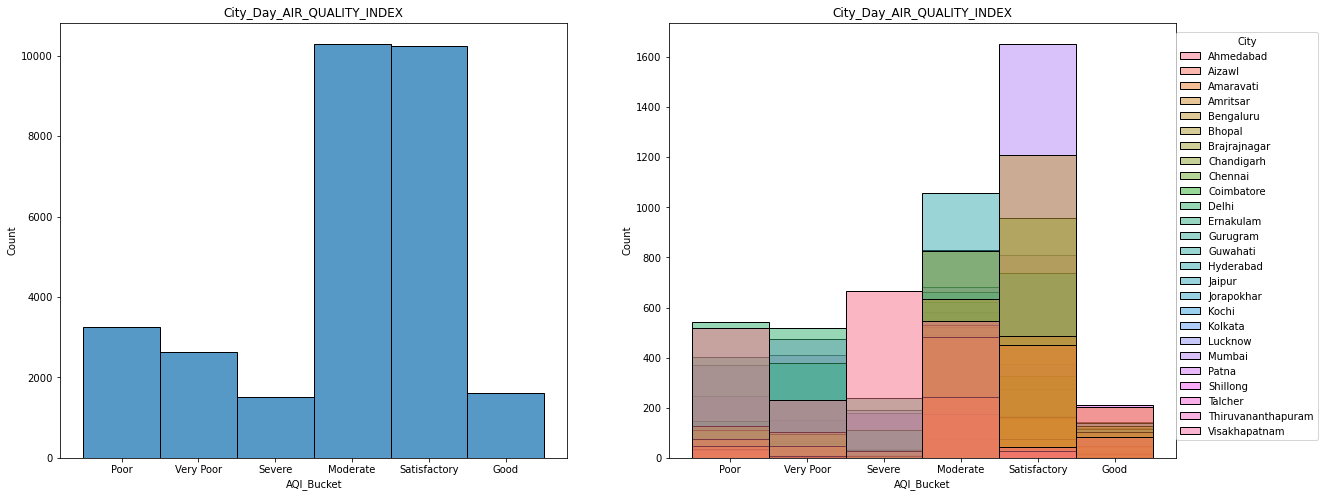

In [409]:
# histogram for all the cleaned datasets
fig = plt.figure(figsize=(20,8))
plt.subplot(121)
plt.title("City_Day_AIR_QUALITY_INDEX")
sb.histplot(data=city_result,x='AQI_Bucket',cbar= True)
plt.subplot(122)
plt.title("City_Day_AIR_QUALITY_INDEX")
g = sb.histplot(data=city_result,x='AQI_Bucket',hue= 'City',legend=True)
sb.move_legend(g, "upper left", bbox_to_anchor=(.99, .99), title='City')
plt.show()


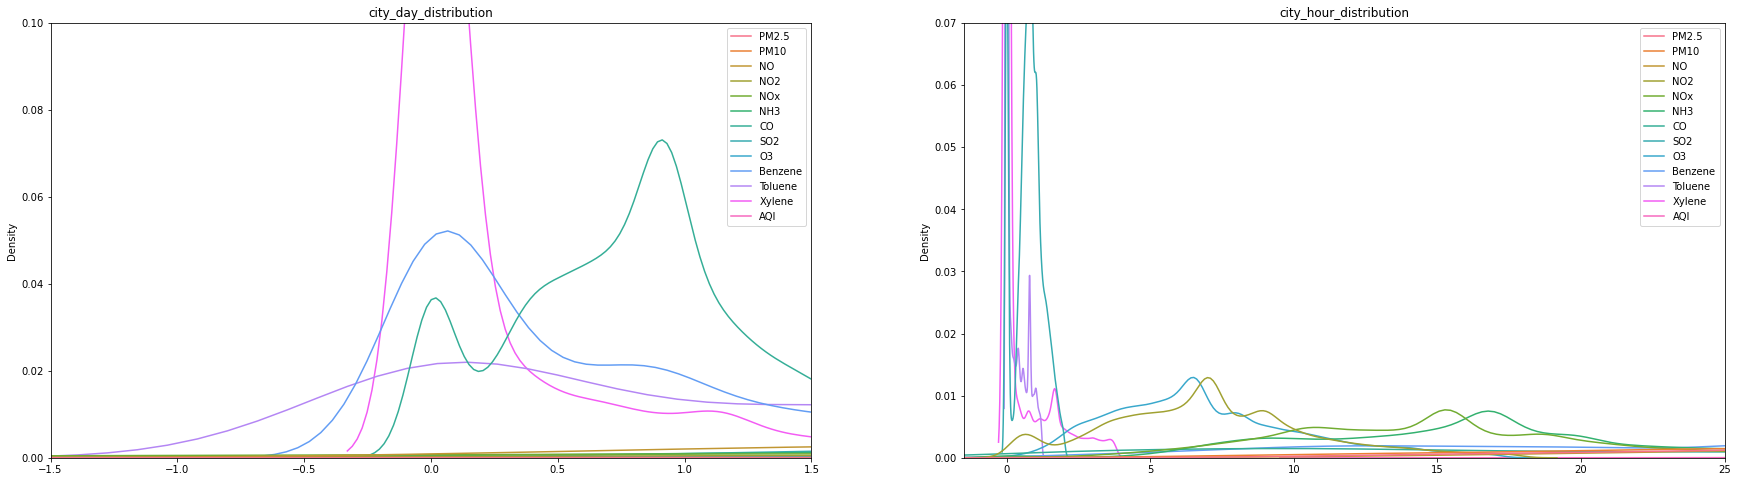

In [218]:
#Checking the distributions of each dataset by using KDE plot
fig = plt.figure(figsize=(30,8))
plt.subplot(121)
plt.title('city_day_distribution')
sb.kdeplot(data=city_result)
plt.xlim(right=1.5)
plt.xlim(left=-1.5)
plt.ylim(top=0.1)
plt.subplot(122)
plt.title('city_hour_distribution')
sb.kdeplot(data=city_hour_result)
plt.xlim(right=25)
plt.xlim(left=-1.5)
plt.ylim(top=0.07)
plt.show()


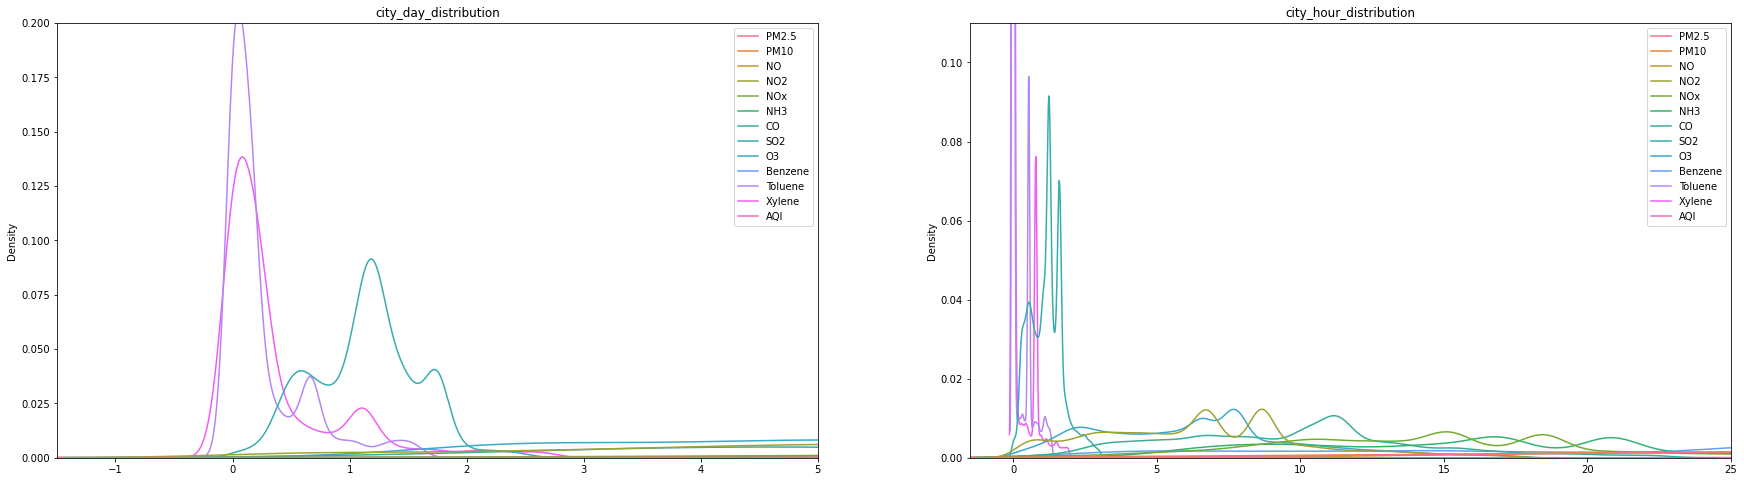

In [219]:
fig = plt.figure(figsize=(30,8))
plt.subplot(121)
plt.title('city_day_distribution')
sb.kdeplot(data=station_day_result)
plt.xlim(right=5)
plt.xlim(left=-1.5)
plt.ylim(top=0.2)
plt.subplot(122)
plt.title('city_hour_distribution')
sb.kdeplot(data=station_hour_result)
plt.xlim(right=25)
plt.xlim(left=-1.5)
plt.ylim(top=0.11)
plt.show()


- from the above analysis none of datasets features follows normal distribution.
- in order to find multivariate linear releatinship between predictors and independent features, the data present in the datasets should follow normal distribution 
- It is recommended to normalize the dataset using various normalizations techniques (Robust, Scalar, min-max normalization)

In [220]:
# join plots to find the basic linear relationship between predictor and independent features present in the dataset

In [221]:
def join_plot_city(df,folder):
    c=0 
    for i in df.columns:
        sb.jointplot(data=city_result[:200], x=city_result[i],y="AQI",kind="reg")
        plt.title('city relationship between features with Air Quality Index',y=1.2,fontsize = 12)
        c+=1
        return plt.savefig(root_path+"\graphs\Distribution plots\{}\plot{}.png".format(str(folder),c))

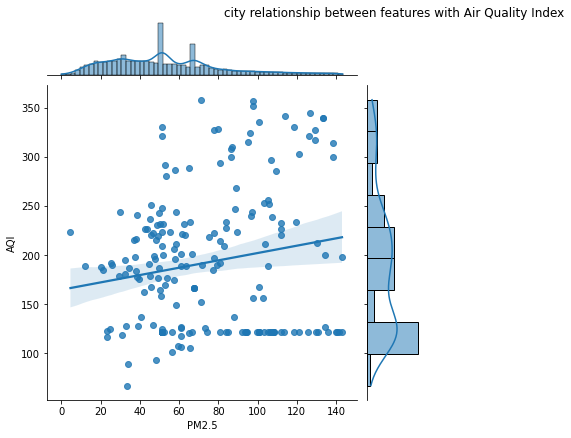

In [222]:
join_plot_city(city_result,'city_relationships_plots')

In [223]:
twmp_city = city_hour_result
twmp_city= twmp_city.drop(['City', 'Date', 'time'],axis=1)


In [224]:
temp_st =station_hour_result
temp_st =station_hour_result.drop(["StationId","Date","time"],axis=1)

In [225]:
temp_stat = station_day_result
temp_stat = temp_stat.drop(['StationId','Date'],axis=1)

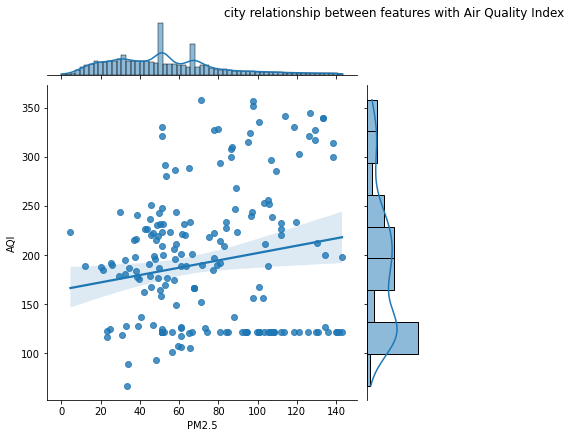

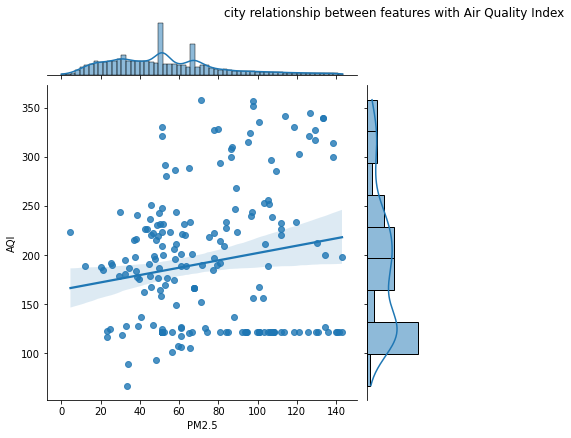

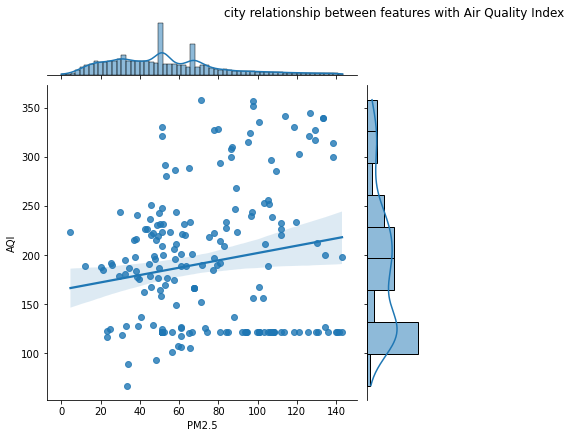

In [226]:
join_plot_city(twmp_city,'city_hour_relationships')

join_plot_city(temp_stat,'station_day relationships')
join_plot_city(temp_st,'station_hour relationships')

## Exploratory Data Analysis

In [227]:
display1.custom_display([round(city_result.describe(),2),round(city_hour_result.describe(),2)],['city_result','city_hour_results'])

city_result city_hour_results 
 
 
 PM2.5 
 PM10 
 NO 
 NO2 
 NOx 
 NH3 
 CO 
 SO2 
 O3 
 Benzene 
 Toluene 
 Xylene 
 AQI 
 
 
 
 
 29531.00 
 29531.00 
 29531.00 
 29531.00 
 29531.00 
 29531.00 
 29531.00 
 29531.00 
 29531.00 
 29531.00 
 29531.00 
 29531.00 
 29531.00 
 
 
 52.20 
 105.46 
 11.41 
 23.48 
 27.20 
 16.45 
 0.98 
 9.95 
 31.23 
 1.44 
 3.23 
 0.48 
 136.38 
 
 
 28.15 
 53.48 
 7.61 
 14.84 
 18.26 
 10.97 
 0.68 
 5.49 
 16.52 
 1.73 
 4.26 
 0.86 
 74.63 
 
 
 0.04 
 0.01 
 0.02 
 0.01 
 0.00 
 0.01 
 0.00 
 0.01 
 0.01 
 0.00 
 0.00 
 0.00 
 13.00 
 
 
 30.89 
 64.76 
 6.12 
 11.76 
 14.21 
 7.98 
 0.51 
 5.87 
 18.86 
 0.02 
 0.00 
 0.00 
 83.00 
 
 
 51.52 
 104.45 
 10.31 
 21.67 
 26.59 
 14.34 
 0.92 
 9.73 
 30.79 
 0.86 
 1.79 
 0.06 
 121.00 
 
 
 67.45 
 132.92 
 15.54 
 30.39 
 33.61 
 23.48 
 1.29 
 12.91 
 40.85 
 2.35 
 4.87 
 0.52 
 166.46 
 
 
 143.34 
 273.34 
 37.05 
 69.36 
 85.46 
 50.78 
 3.18 
 29.13 
 79.60 
 7.73 
 20.27 
 3.21 
 358.00 
 
 
 
 
 
 PM2.5 
 PM10 
 NO 
 NO2 
 NOx 
 NH3 
 CO 
 SO2 
 O3 
 Benzene 
 Toluene 
 Xylene 
 AQI 
 
 
 
 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 
 
 45.32 
 41.32 
 46.01 
 7.06 
 15.44 
 16.83 
 38.70 
 0.78 
 6.90 
 28.97 
 0.12 
 0.41 
 97.04 
 
 
 20.16 
 20.16 
 18.67 
 3.59 
 6.24 
 6.88 
 32.10 
 0.47 
 3.34 
 17.74 
 0.28 
 0.85 
 34.28 
 
 
 4.02 
 0.02 
 0.01 
 0.01 
 0.02 
 0.00 
 0.01 
 0.00 
 0.01 
 0.01 
 0.00 
 0.00 
 21.00 
 
 
 30.47 
 26.47 
 32.31 
 4.64 
 10.99 
 12.16 
 13.11 
 0.52 
 4.47 
 15.16 
 0.00 
 0.00 
 73.00 
 
 
 43.59 
 39.59 
 45.41 
 7.08 
 15.34 
 16.80 
 33.49 
 0.82 
 6.57 
 26.94 
 0.00 
 0.00 
 92.00 
 
 
 57.18 
 53.18 
 57.67 
 9.03 
 18.69 
 19.98 
 55.52 
 1.05 
 8.80 
 38.74 
 0.02 
 0.20 
 113.00 
 
 
 106.77 
 102.77 
 102.61 
 17.96 
 35.48 
 38.03 
 141.35 
 2.02 
 17.22 
 82.61 
 1.22 
 3.84 
 203.00

In [228]:
display1.custom_display([round(station_day_result.describe(),2),round(station_hour_result.describe(),2)],['station_day_result','station_hour_result'])

station_day_result station_hour_result 
 
 
 PM2.5 
 PM10 
 NO 
 NO2 
 NOx 
 NH3 
 CO 
 SO2 
 O3 
 Benzene 
 Toluene 
 Xylene 
 AQI 
 
 
 
 
 2395.00 
 2395.00 
 2395.00 
 2395.00 
 2395.00 
 2395.00 
 2395.00 
 2395.00 
 2395.00 
 2395.00 
 2395.00 
 2395.00 
 2395.00 
 
 
 55.66 
 43.66 
 40.24 
 7.61 
 16.07 
 18.25 
 11.04 
 1.14 
 6.79 
 28.50 
 0.25 
 0.38 
 91.47 
 
 
 26.17 
 19.69 
 9.79 
 3.72 
 7.08 
 8.61 
 6.50 
 0.44 
 3.43 
 13.15 
 0.35 
 0.55 
 27.58 
 
 
 0.16 
 0.02 
 14.79 
 0.19 
 0.09 
 0.00 
 0.23 
 0.00 
 0.48 
 1.80 
 0.00 
 0.00 
 25.00 
 
 
 33.28 
 29.03 
 34.03 
 5.07 
 10.98 
 12.02 
 5.61 
 0.82 
 4.20 
 19.02 
 0.01 
 0.01 
 75.00 
 
 
 60.38 
 43.79 
 39.56 
 7.90 
 15.52 
 17.33 
 9.78 
 1.19 
 6.63 
 27.52 
 0.15 
 0.21 
 92.60 
 
 
 67.45 
 53.55 
 46.73 
 9.46 
 18.64 
 21.52 
 15.60 
 1.43 
 8.84 
 35.72 
 0.30 
 0.43 
 106.50 
 
 
 127.94 
 101.03 
 66.16 
 18.13 
 38.04 
 43.39 
 30.59 
 2.58 
 17.53 
 65.80 
 1.65 
 2.76 
 177.00 
 
 
 
 
 
 PM2.5 
 PM10 
 NO 
 NO2 
 NOx 
 NH3 
 CO 
 SO2 
 O3 
 Benzene 
 Toluene 
 Xylene 
 AQI 
 
 
 
 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 57421.00 
 
 
 41.32 
 39.42 
 37.10 
 6.52 
 15.14 
 16.89 
 9.79 
 1.16 
 6.47 
 24.74 
 0.15 
 0.18 
 91.67 
 
 
 20.16 
 20.01 
 13.50 
 3.58 
 6.78 
 8.26 
 4.51 
 0.57 
 3.63 
 15.48 
 0.31 
 0.38 
 29.78 
 
 
 0.02 
 0.01 
 0.82 
 0.01 
 0.01 
 0.00 
 0.01 
 0.00 
 0.01 
 0.01 
 0.00 
 0.00 
 17.00 
 
 
 26.47 
 24.61 
 27.83 
 3.76 
 10.43 
 10.53 
 6.46 
 0.71 
 3.55 
 12.75 
 0.00 
 0.00 
 72.00 
 
 
 39.59 
 39.65 
 37.94 
 6.77 
 15.16 
 16.91 
 10.26 
 1.25 
 6.63 
 25.56 
 0.00 
 0.00 
 95.00 
 
 
 53.18 
 49.91 
 44.63 
 8.65 
 18.48 
 20.84 
 12.13 
 1.59 
 8.18 
 29.70 
 0.04 
 0.05 
 108.95 
 
 
 102.77 
 98.76 
 73.48 
 17.48 
 36.20 
 42.40 
 23.02 
 3.06 
 17.77 
 71.41 
 1.36 
 1.97 
 184.40

## Day-wise analysis

### 1. Average pollution and AQI for each and everyday over the spawn of 5 years

In [229]:
plt.figure(figsize=(20,10))
date_wise = city_result.groupby(['Date']).mean()
date_wise

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,,
2015-01-01,49.951000,85.371333,7.449667,18.384333,18.208333,14.178667,0.710000,10.986333,24.762333,0.490000,1.730000,0.030333,125.400000
2015-01-02,49.568333,125.371000,7.594000,18.524000,18.380000,17.942333,0.898333,11.662667,24.755667,1.215000,6.106667,0.188333,139.200000
2015-01-03,86.122667,131.668333,12.893333,18.482333,23.103333,10.964667,0.741667,11.127667,21.851333,2.183333,8.440000,0.716667,165.066667
2015-01-04,57.886857,129.413714,8.719143,19.924286,20.894286,8.019714,0.822857,10.894571,23.851429,1.702857,5.462857,0.318571,205.114286
2015-01-05,48.897714,133.198857,10.498571,17.692857,21.915714,14.035143,0.817143,8.431429,23.606571,1.870000,5.922857,0.919429,145.171429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,25.859099,56.908196,9.676490,15.552718,18.198274,13.286441,0.798023,9.553538,28.600824,0.823109,2.892345,0.412851,76.210138
2020-06-28,26.511561,55.849889,10.027874,14.206948,18.367736,12.948288,0.781869,9.816615,29.127670,0.777340,2.173114,0.474236,80.902445
2020-06-29,25.260715,58.307965,10.087028,15.174641,18.633812,13.562441,0.816869,10.077768,28.198055,0.860802,2.208114,0.531928,79.863984


<Figure size 1440x720 with 0 Axes>

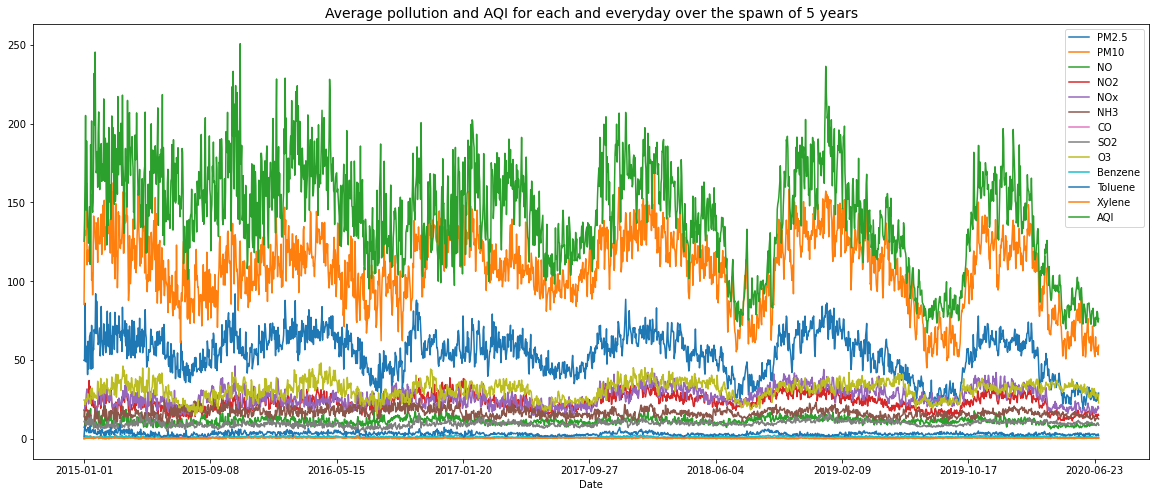

In [249]:
date_wise.plot(kind='line')
plt.title('Average pollution and AQI for each and everyday over the spawn of 5 years',fontsize=14)
plt.savefig(root_path+'/graphs/timeseries explorations/plot1.png')

### 2. Average pollution and AQI for each and everyday in the year 2020

In [231]:
year_filter = pd.to_datetime(city_result['Date'], format='%Y-%m-%d').dt.year == 2020
city_2020 = city_result[year_filter]
city_2020 = city_2020.groupby(['Date']).mean()

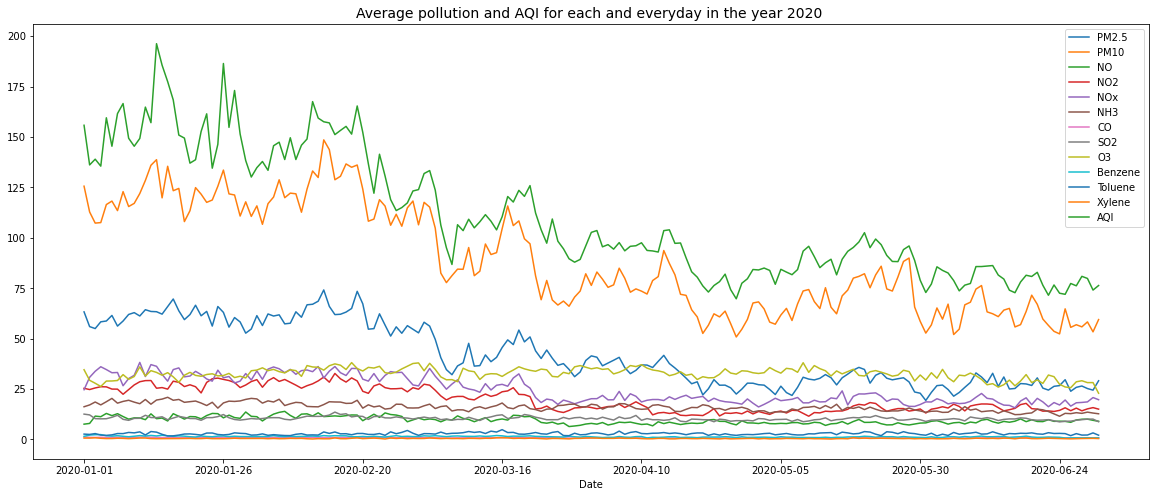

In [250]:
city_2020.plot(kind='line')
plt.title('Average pollution and AQI for each and everyday in the year 2020 ',fontsize=14)
plt.savefig(root_path+'/graphs/timeseries explorations/plot2.png')

# Hour wise analysis

### 3.Average Air Pollution and Air Quality index in the morning and evening

In [233]:
temp_hour = city_hour_result
temp_hour['time'] =  pd.to_datetime(temp_hour['time'],format= '%H:%M:%S' ).dt.hour

In [234]:
morning = temp_hour[(temp_hour['time']>=6) & (temp_hour['time']<=12)]
evening = temp_hour[(temp_hour['time']>=16) & (temp_hour['time']<=19)]

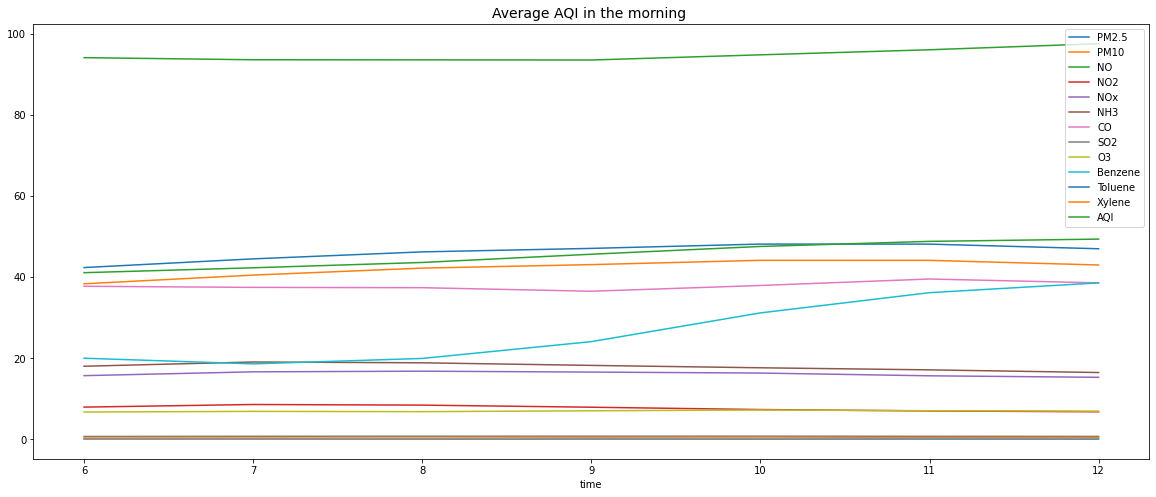

In [251]:
tempp  = morning.groupby(['time']).mean()
tempp.plot(kind='line')
plt.title('Average AQI in the morning ',fontsize=14)
plt.savefig(root_path+'/graphs/timeseries explorations/plot3.png')

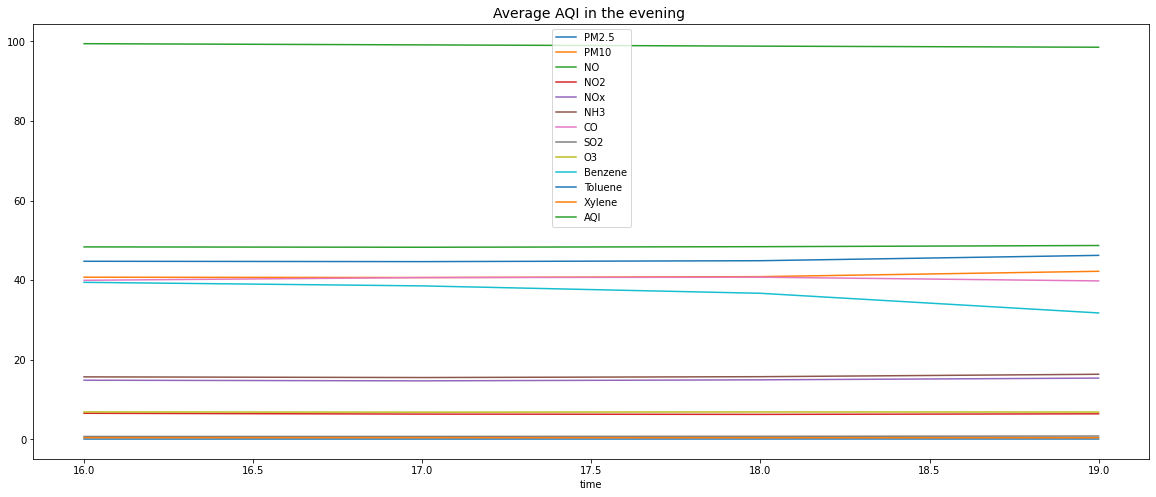

In [252]:
tempe  = evening.groupby(['time']).mean()
tempe.plot(kind='line')
plt.title('Average AQI in the evening ',fontsize=14)
plt.savefig(root_path+'/graphs/timeseries explorations/plot4.png')

#### 4.Average Air Quality index in throughout the day

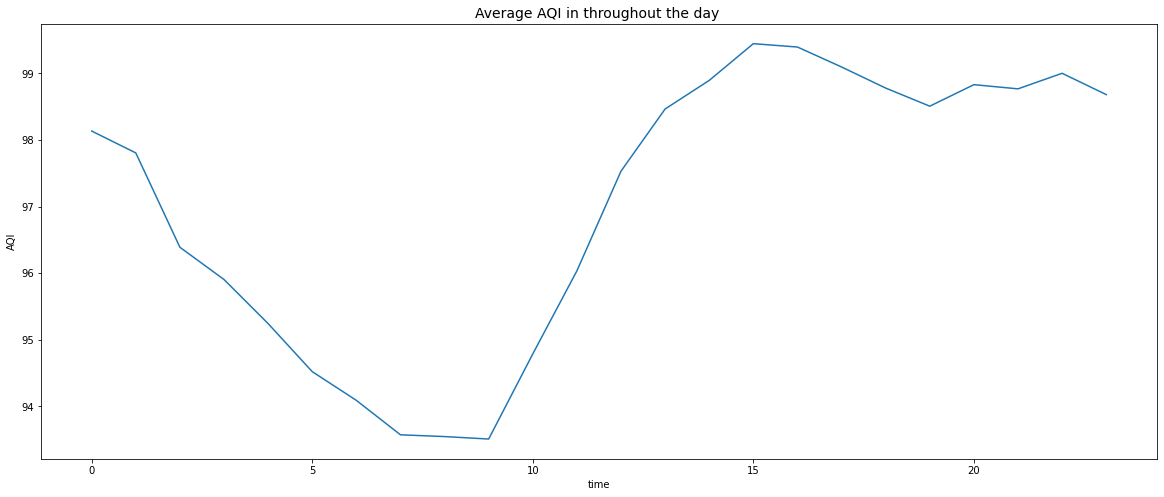

In [253]:
temp_hour.groupby(['time'])['AQI'].mean().plot(kind='line')
plt.title('Average AQI in throughout the day ',fontsize=14)
plt.ylabel("AQI")
plt.savefig(root_path+'/graphs/timeseries explorations/plot5.png')

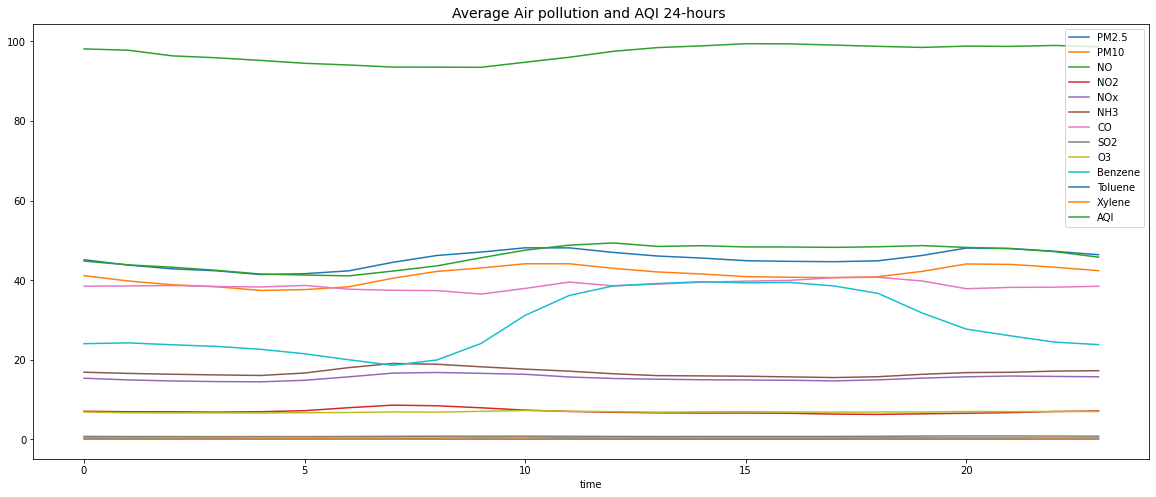

In [258]:
tempe  = temp_hour.groupby(['time']).mean()
tempe.plot(kind='line')
plt.title('Average Air pollution and AQI 24-hours ',fontsize=14)
plt.savefig(root_path+'/graphs/timeseries explorations/plot6.png')

#### 5.Average Air Quality index over five years during morning hours

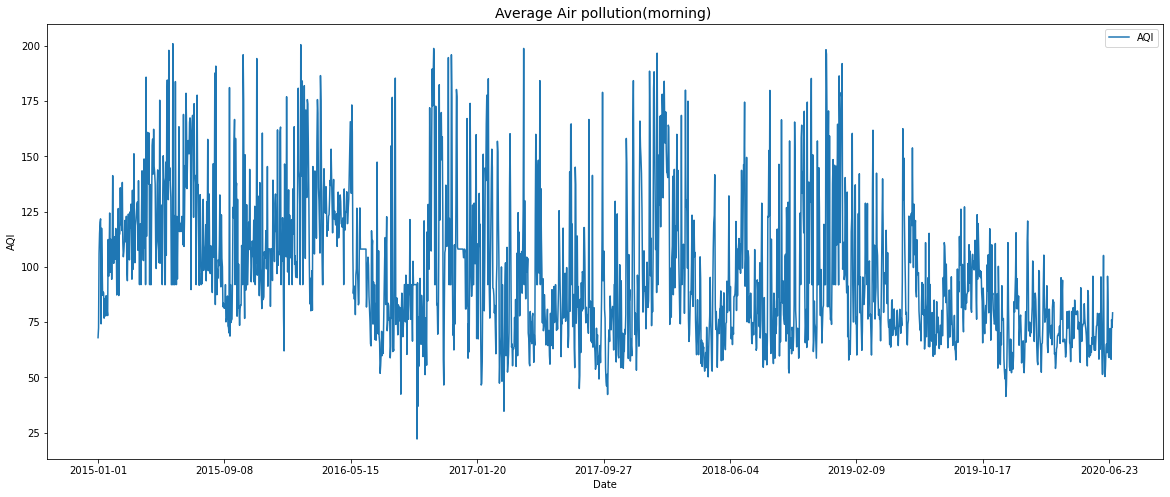

In [501]:
tempm  = morning.groupby(['Date'])[['AQI']].mean()
tempm.sort_values(by='Date',ascending=True).plot(kind='line')
plt.title('Average Air pollution(morning) ',fontsize=14)
plt.ylabel("AQI")
plt.savefig(root_path+'/graphs/timeseries explorations/plot7.png')

#### 6.Average Air Quality index over five years during Evening hours

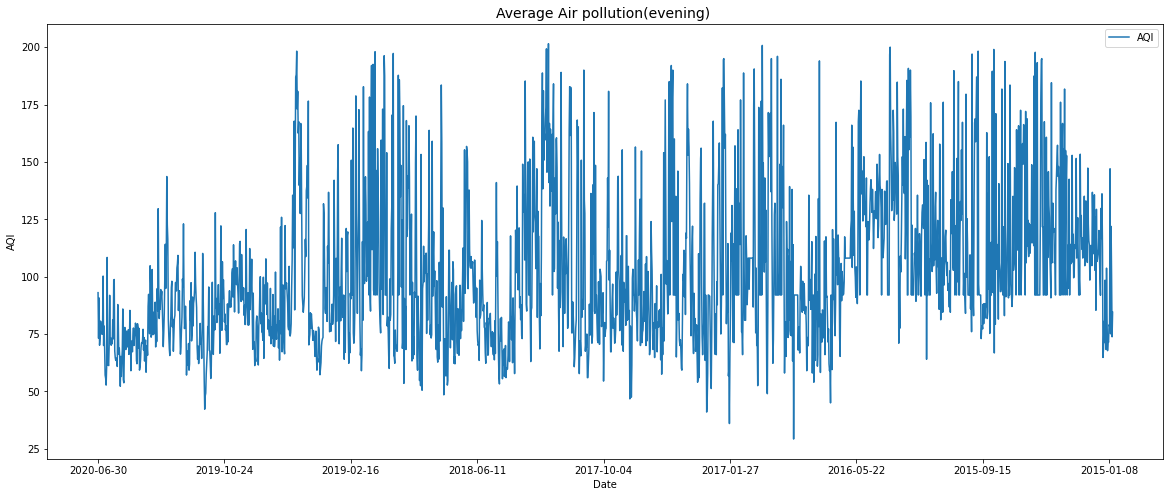

In [502]:
tempee  = evening.groupby(['Date'])[['AQI']].mean()
tempee.sort_values(by='Date',ascending=False).plot(kind='line')
plt.title('Average Air pollution(evening) ',fontsize=14)
plt.ylabel("AQI")
plt.savefig(root_path+'/graphs/timeseries explorations/plot8.png')

# City wise analysis

### 7.Average Air Quality index over five years for chennai

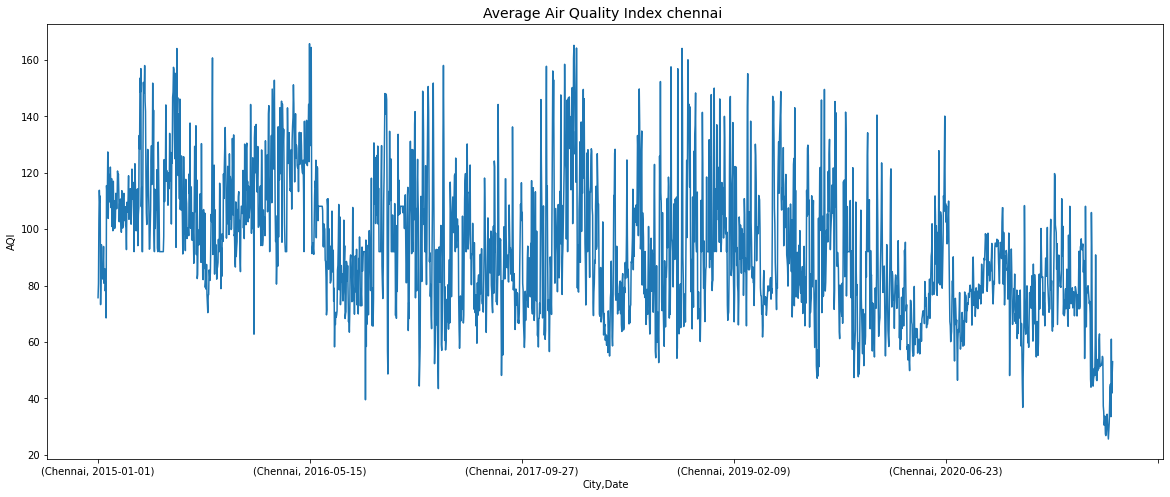

In [503]:
temp_hour.groupby(['City','Date'])['AQI'].mean().plot(kind='line')
plt.title('Average Air Quality Index chennai ',fontsize=14)
plt.ylabel("AQI")
plt.savefig(root_path+'/graphs/timeseries explorations/plot_chennai.png')

### 8.Average Air Quality index over five years for Coimbatore

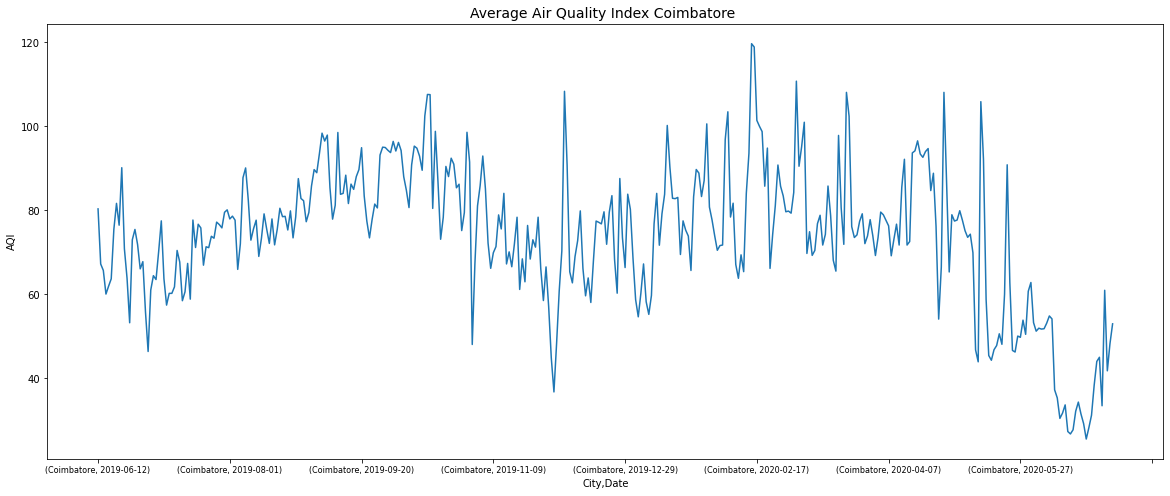

<Figure size 1440x576 with 0 Axes>

In [504]:
temp_hour[temp_hour['City']=='Coimbatore'].groupby(['City','Date'])['AQI'].mean().plot(kind='line')
plt.xticks(fontsize=8)
plt.title('Average Air Quality Index Coimbatore ',fontsize=14)
plt.ylabel("AQI")
plt.show()
plt.savefig(root_path+'/graphs/timeseries explorations/plot_coimbatore.png')

### 9. AQI and pollution index all over india

In [417]:
city_result

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,City,Date,AQI_Bucket
0,23.178,126.112,0.92,18.22,17.15,10.294,0.92,27.64,30.79,0.00,0.02,0.00,122.4,Ahmedabad,2015-01-01,Poor
1,24.736,123.518,0.97,15.69,16.46,10.366,0.97,24.55,34.06,3.68,5.50,0.06,124.2,Ahmedabad,2015-01-02,Poor
2,121.276,161.864,17.40,19.30,29.70,8.950,0.92,29.07,30.70,6.80,16.40,2.25,121.0,Ahmedabad,2015-01-03,Poor
3,40.686,159.470,1.70,18.48,17.97,12.088,1.70,18.59,36.08,4.43,10.14,1.00,136.6,Ahmedabad,2015-01-04,Poor
4,51.520,215.888,22.10,21.42,37.76,9.036,0.92,9.73,39.31,7.01,18.89,2.78,121.0,Ahmedabad,2015-01-05,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.020,50.940,7.68,25.06,19.54,12.470,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Visakhapatnam,2020-06-27,Good
29527,24.380,74.090,3.42,26.06,16.53,11.990,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Visakhapatnam,2020-06-28,Satisfactory
29528,22.910,65.730,3.45,29.53,18.33,10.710,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Visakhapatnam,2020-06-29,Satisfactory
29529,16.640,49.970,4.05,29.26,18.80,10.030,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Visakhapatnam,2020-06-30,Satisfactory


In [418]:
temp_day = city_result
temp_day['Date'] = pd.to_datetime(temp_day['Date'], format='%Y-%m-%d').dt.year


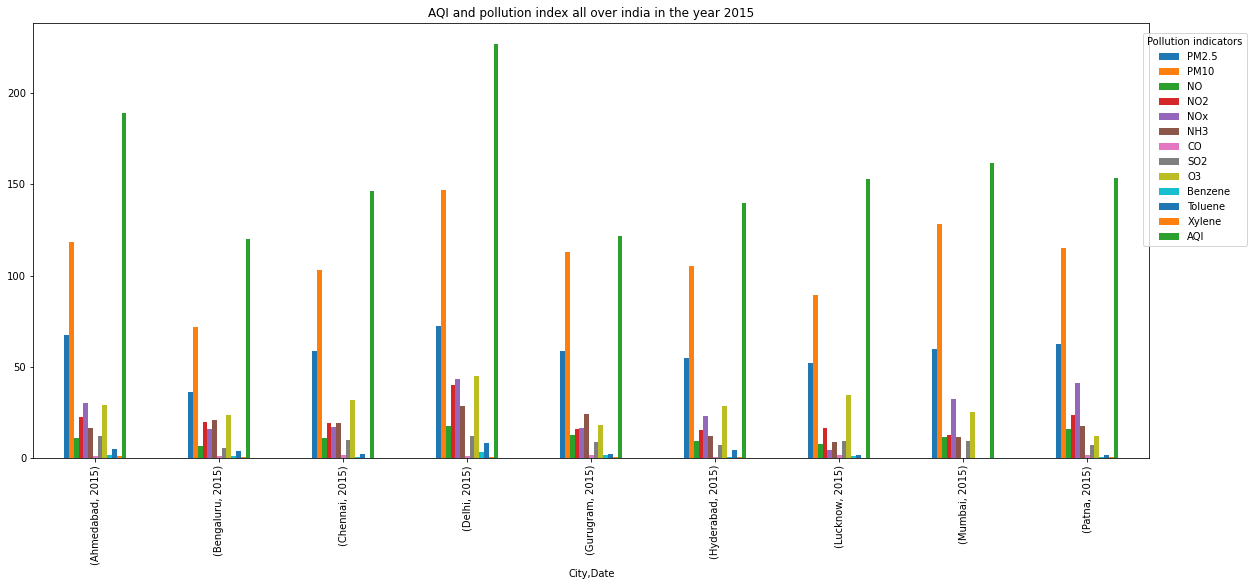

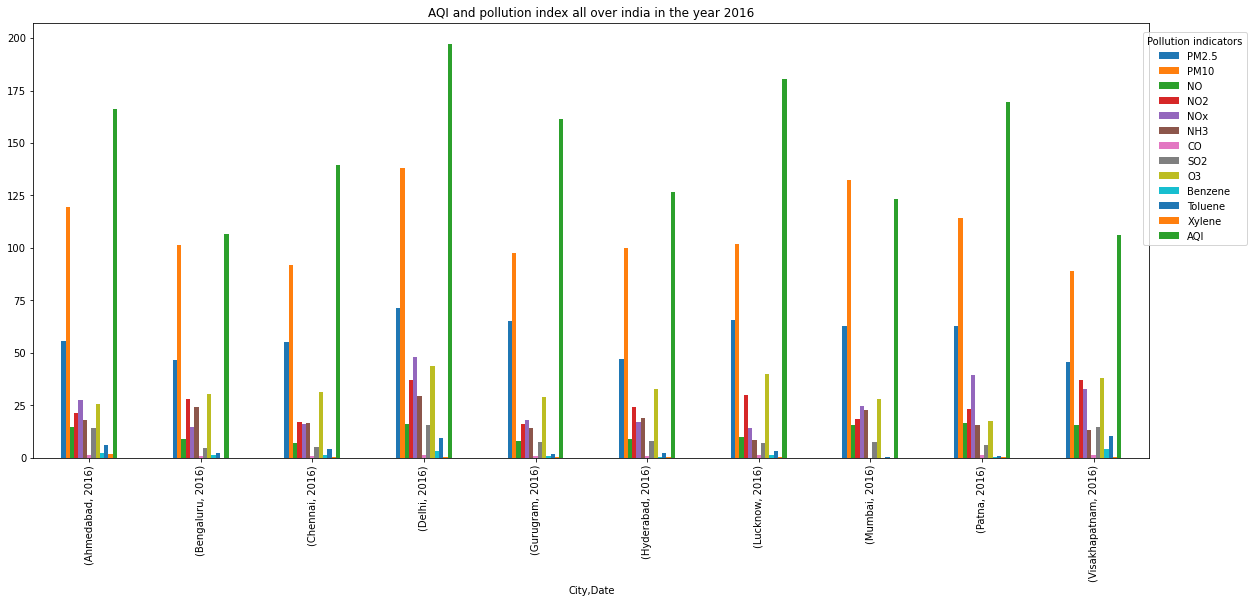

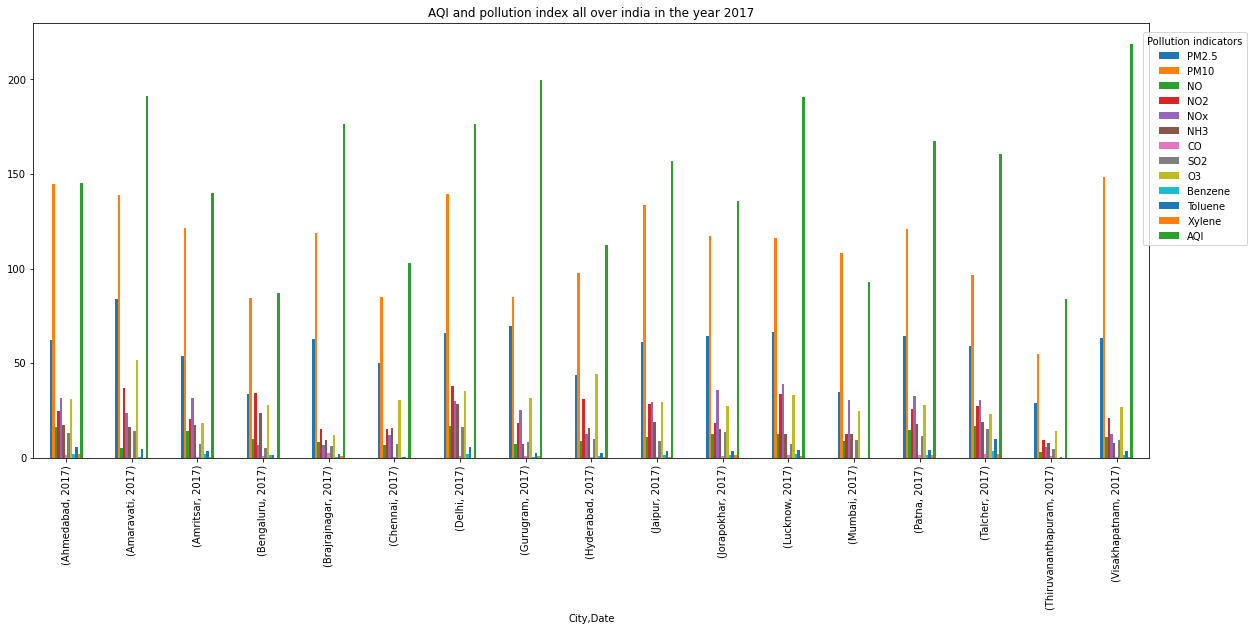

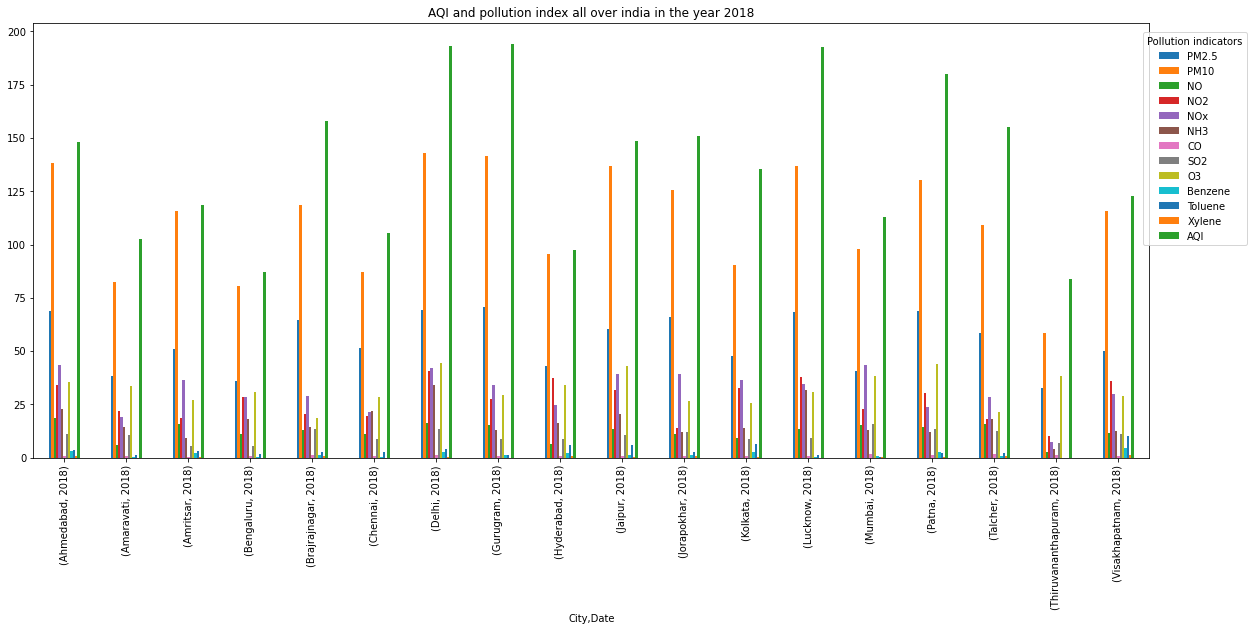

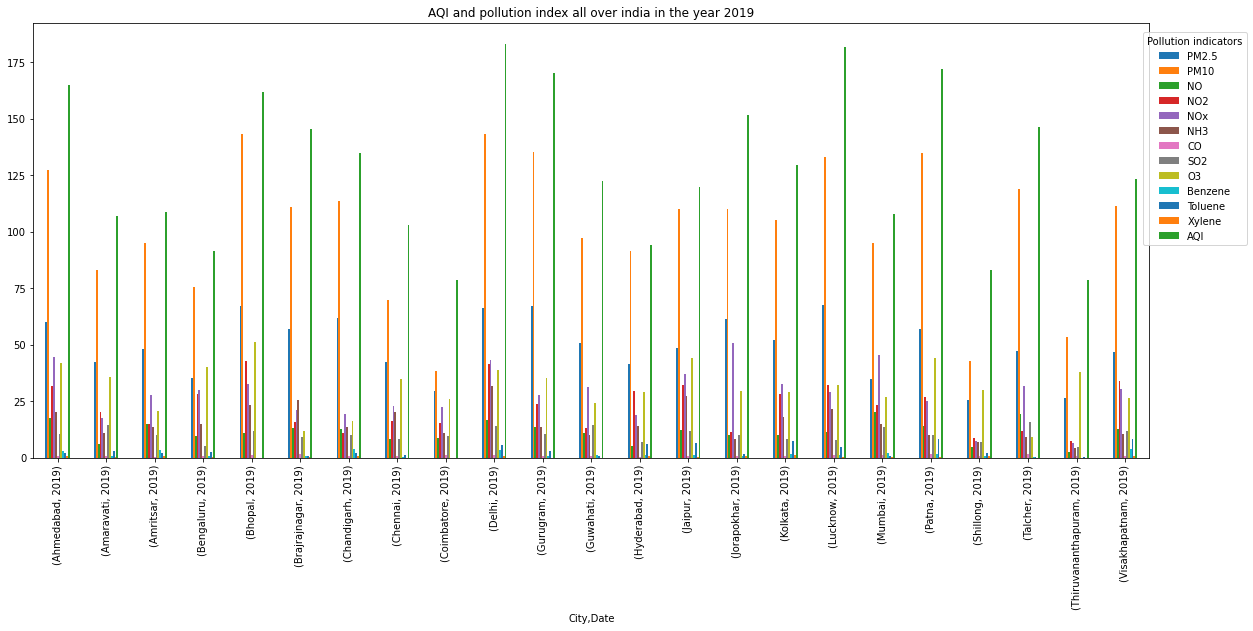

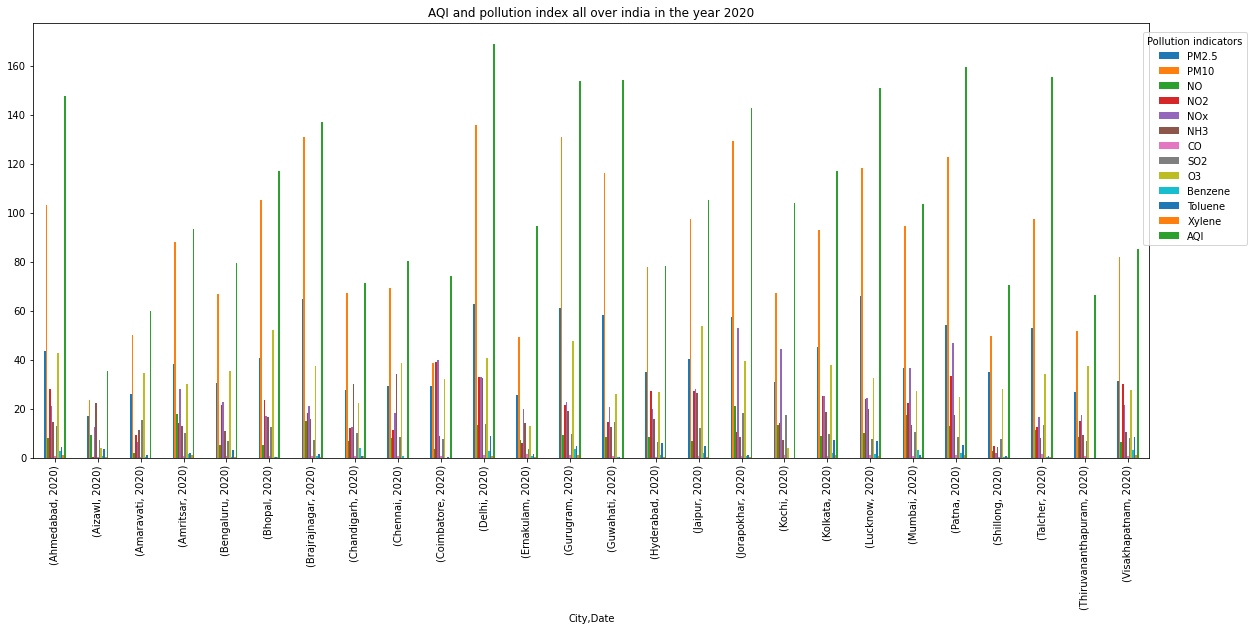

In [487]:
c=9
for i in temp_day['Date'].unique():
    plot_data = temp_day[temp_day['Date']==i].groupby(['City','Date']).mean().plot(kind='bar')
    plt.title('AQI and pollution index all over india in the year {}'.format(i))
    sb.move_legend(plot_data, "upper left", bbox_to_anchor=(.99, .99), title='Pollution indicators')
    plt.savefig(root_path+'/graphs/timeseries explorations/India_pollution_in_{}.png'.format(i))
plt.show()

### 10. Top 10 Cities which have worst pollution index

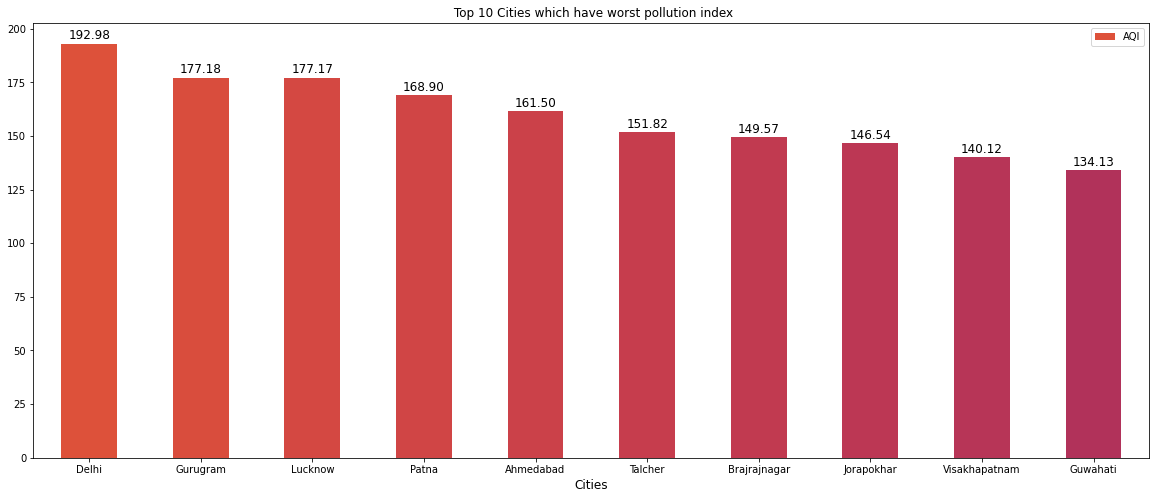

In [495]:
color = cm.inferno_r(np.linspace(.4, .8, 30))

plot = temp_day.groupby(['City'])['AQI'].mean().sort_values(ascending=False).head(10).plot(kind='bar',color=color,stacked=True,legend=True)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(' Top 10 Cities which have worst pollution index')
plt.xticks(rotation=0)
plt.xlabel('Cities',fontsize=12)
plt.savefig(root_path+'/graphs/timeseries explorations/top_10_polluted.png')
plt.show()

### 10. Top 10 least polluted cities

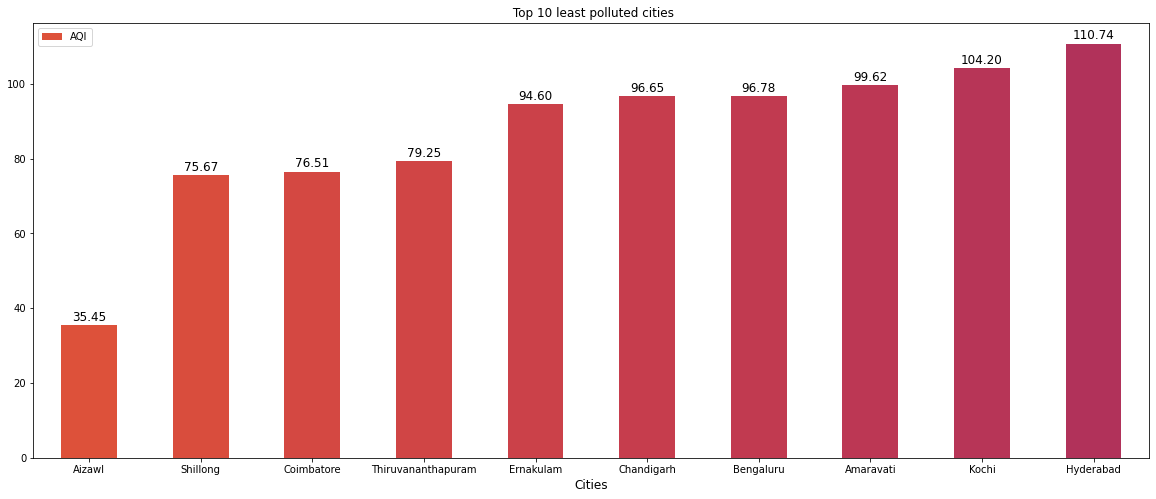

In [496]:
plot = temp_day.groupby(['City'])['AQI'].mean().sort_values(ascending=True).head(10).plot(kind='bar',color=color,stacked=True,legend=True)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(' Top 10 least polluted cities')
plt.xticks(rotation=0)
plt.xlabel('Cities',fontsize=12)
plt.savefig(root_path+'/graphs/timeseries explorations/top_10_Least_polluted.png')
plt.show()

# Regression analysis and Predictive modelling
  - Data Normalization
  - Splitting the dataset into training and testing (70:30 ratio with random_seed = 42)
  - PCA (Principal Component Analysis)
  - Multiple Linear Regression
  - SVM Regression

In [18]:
temp_dp = city_day
temp_dp.drop(['City','Date','AQI_Bucket'],axis=1,inplace=True)

In [19]:
columns_to_remove_null_rows = [i for i in temp_dp.columns if temp_dp[i].isna().sum()/temp_dp.shape[0]<=0.1 and temp_dp[i].isna().sum()>0]

columns_to_impute = [i for i in temp_dp.columns if i not in columns_to_remove_null_rows and temp_dp[i].isna().sum()>0]

print("Columns in which rows will be removed:", columns_to_remove_null_rows)
print("Columns which will be imputed:", columns_to_impute)

Columns in which rows will be removed: ['CO']
Columns which will be imputed: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']


In [21]:
from sklearn.impute import SimpleImputer

def remove_rows(data, column):
  return data[data[column].isna()==False]

for i in columns_to_remove_null_rows:
  temp_dp = remove_rows(temp_dp, i)

imputer = SimpleImputer()
temp_dp[columns_to_impute] = imputer.fit_transform(temp_dp[columns_to_impute])

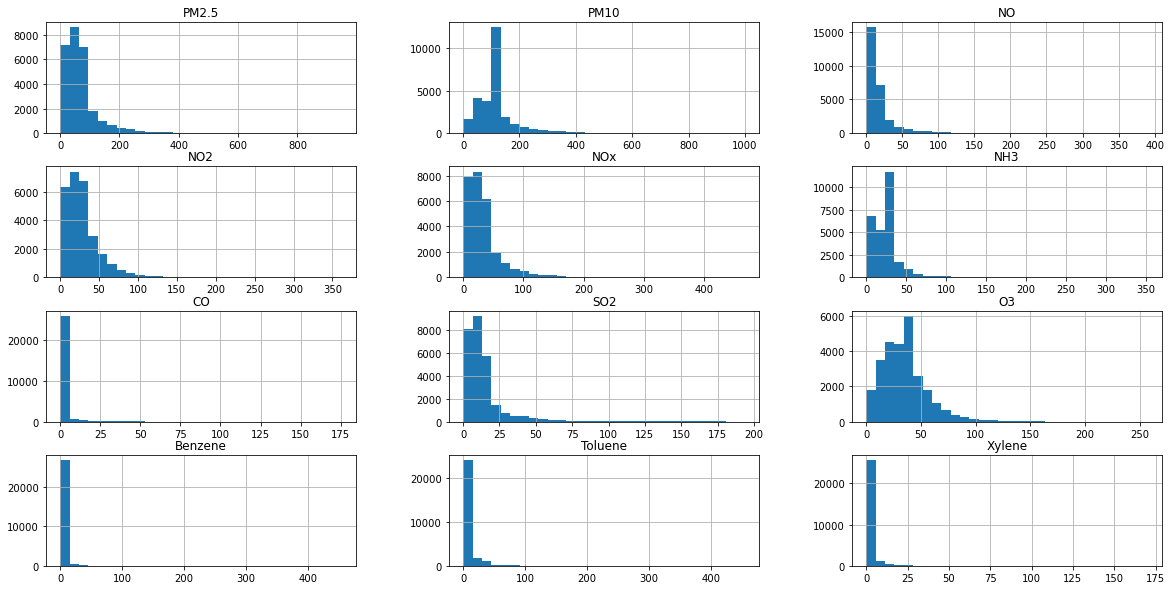

In [46]:
temp_dp[[i for i in temp_dp.columns if i not in ["AQI"]]].hist(bins=30, figsize=(20, 10))
plt.show()


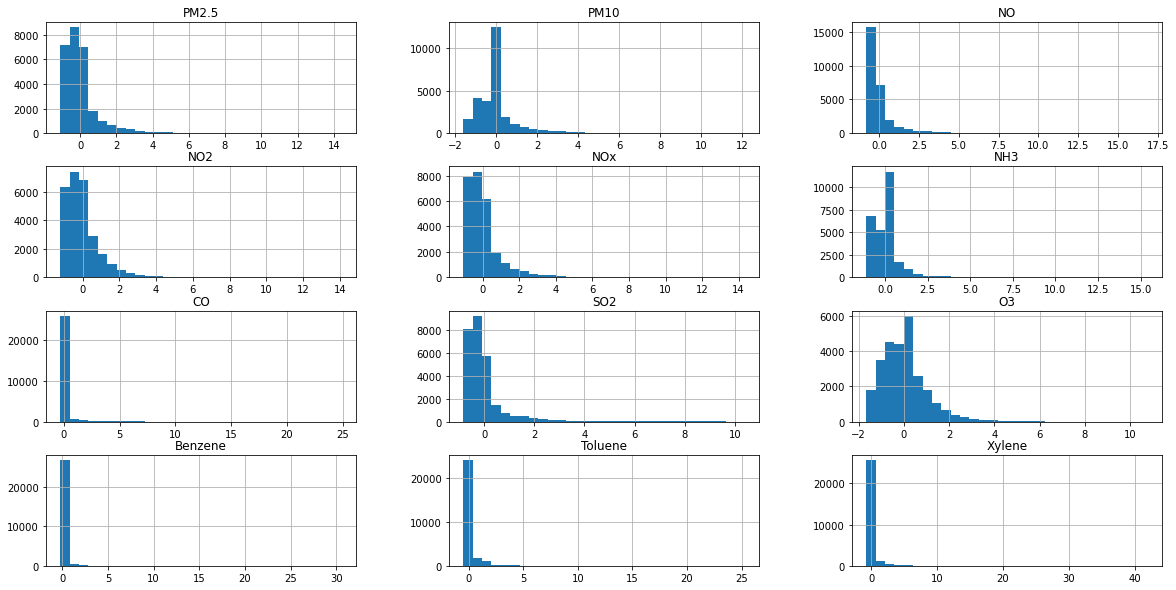

In [34]:
dataset_norm_test = temp_dp[[i for i in temp_dp.columns if i not in ["AQI"]]].copy()
scaler = StandardScaler()
dataset_norm_test = pd.DataFrame(scaler.fit_transform(dataset_norm_test),columns=dataset_norm_test.columns)
dataset_norm_test.hist(bins=30, figsize=(20, 10))
plt.show()

In [ ]:

dataset_yeo_test = temp_dp[[i for i in temp_dp.columns if i not in ["AQI"]]].copy()
c=0
for i in dataset_yeo_test.columns:
  yeo_t,param = stats.yeojohnson(dataset_yeo_test[i])
  plt.hist(yeo_t,bins=25)
  plt.xlabel(i)
  plt.title("Distribution of variable after normalisation")
  c+=1
  plt.savefig(root_path+'\graphs\Distribution plots\distribution after normalization\plot{}.png'.format(c))
  plt.show()

In [67]:
columns_to_binarize = ['Benzene','Toluene','Xylene']
columns_to_yeo = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3']

print('Columns to binarize:',columns_to_binarize)
print('Columns to yeo transform: ', columns_to_yeo)

Columns to binarize: ['Benzene', 'Toluene', 'Xylene']
Columns to yeo transform:  ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']


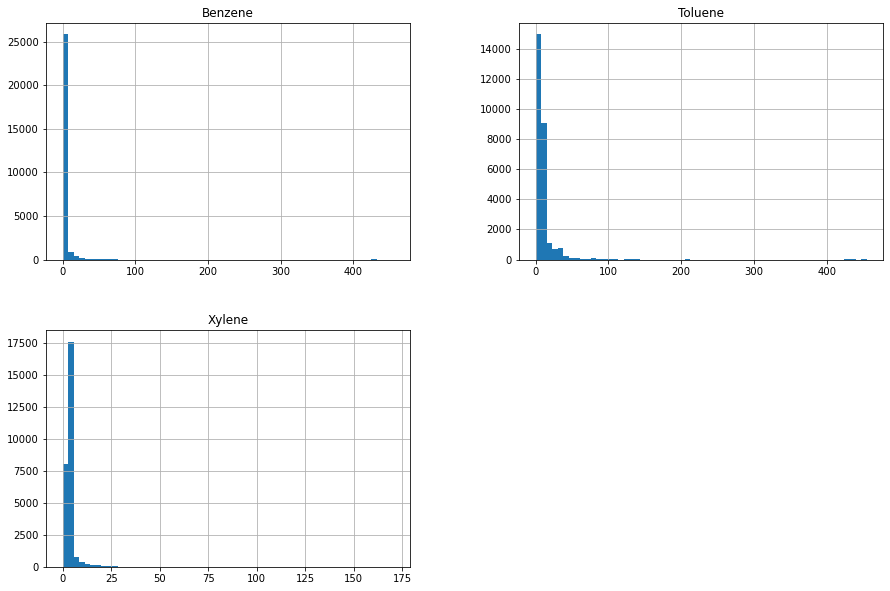

In [68]:
temp_dp[columns_to_binarize].hist(bins=60, figsize=(15, 10))
plt.show()

In [74]:
binarize_threshold = {
    'Benzene' : 30,
    'Xylene' : 30,
    'Toluene' : 30,
}

def binarize(value, thresold):
  if value<=thresold:
    return 0
  return 1

for col in columns_to_binarize:
  new_col = col+"_binarized"
  temp_dp[new_col] = temp_dp[col].apply(lambda x: binarize(x, binarize_threshold[col]))

yeo_transform_params = {}

for col in columns_to_yeo:
  yeo_t,param = stats.yeojohnson(dataset_yeo_test[col])
  yeo_transform_params[col] = param
  temp_dp[col] = yeo_t

temp_dp

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Benzene_binarized,Toluene_binarized,Xylene_binarized
0,4.417415,9.937684,0.637680,3.891406,4.316681,4.337479,0.495803,2.385886,16.388838,0.00000,0.020000,0.000000,166.445401,0,0,0
1,4.417415,9.937684,0.662220,3.655357,4.235054,4.337479,0.510087,2.329920,8.267572,3.68000,5.500000,3.770000,166.445401,0,0,0
2,4.417415,9.937684,2.635103,3.984443,5.508349,4.337479,1.045493,2.409353,7.824572,6.80000,16.400000,2.250000,166.445401,0,0,0
3,4.417415,9.937684,0.959564,3.914189,4.410749,4.337479,0.661226,2.194240,8.522170,4.43000,10.140000,1.000000,166.445401,0,0,0
4,4.417415,9.937684,2.819226,4.155827,6.091052,4.337479,1.061217,2.545633,8.913141,7.01000,18.890000,2.780000,166.445401,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2.856602,7.169654,2.005755,4.421251,4.582753,3.311771,0.326541,1.785687,6.742186,2.24000,12.070000,0.730000,41.000000,0,0,0
29527,3.346829,8.327968,1.411570,4.488804,4.243443,3.254160,0.349991,1.999638,7.748141,0.74000,2.210000,0.380000,70.000000,0,0,0
29528,3.282992,7.944111,1.417666,4.708333,4.451096,3.091503,0.331351,1.777260,7.859793,0.01000,0.010000,0.000000,68.000000,0,0,0
29529,2.958842,7.113530,1.531116,4.692009,4.502942,2.999063,0.349991,1.862419,7.491263,0.00000,0.000000,0.000000,54.000000,0,0,0


In [75]:
yeo_transform_params

{'PM2.5': 0.021095829232030367,
 'PM10': 0.27684376622062196,
 'NO': -0.06988426182596016,
 'NO2': 0.17822497869560405,
 'NOx': 0.25868163624946644,
 'NH3': 0.17902808975456067,
 'CO': -0.8835069207954416,
 'SO2': -0.2161953163343132,
 'O3': 0.42230969983130356}

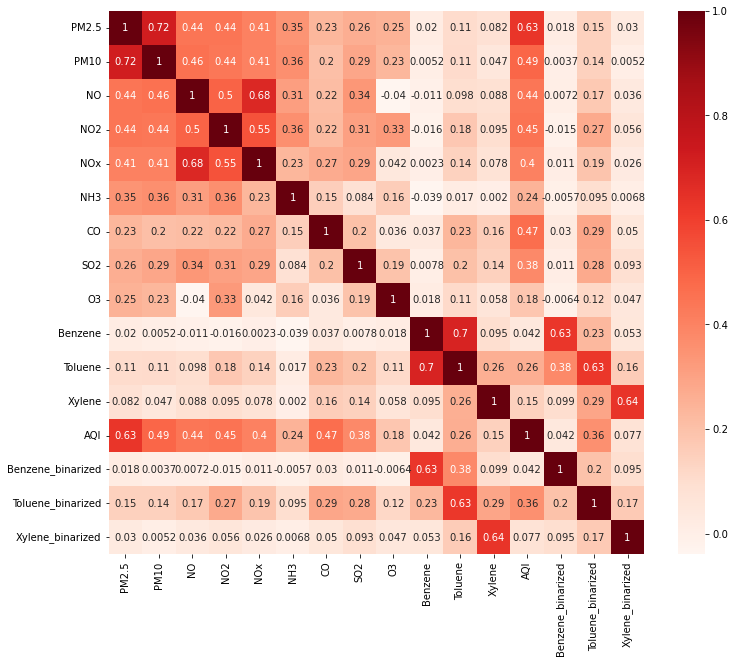

In [76]:
temp_dpcorr = temp_dp[[i for i in temp_dp.columns if i!="AQI_Bucket"]]

plt.figure(figsize=(12,10))
cor = temp_dpcorr.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [77]:
temp_dp.drop(columns = columns_to_binarize+['NOx'],inplace=True)

### PCA (Principal Component Analysis)

In [82]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn import metrics
import warnings

In [81]:
temp_dp['AQI'] = np.log(temp_dp['AQI'])
temp_dp

C:\ProgramData\Anaconda3\envs\Sinha_project\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning:

invalid value encountered in log



,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,AQI,Benzene_binarized,Toluene_binarized,Xylene_binarized
0,4.417415,9.937684,0.637680,3.891406,4.337479,0.495803,2.385886,16.388838,-0.713605,0,0,0
1,4.417415,9.937684,0.662220,3.655357,4.337479,0.510087,2.329920,8.267572,-0.713605,0,0,0
2,4.417415,9.937684,2.635103,3.984443,4.337479,1.045493,2.409353,7.824572,-0.713605,0,0,0
3,4.417415,9.937684,0.959564,3.914189,4.337479,0.661226,2.194240,8.522170,-0.713605,0,0,0
4,4.417415,9.937684,2.819226,4.155827,4.337479,1.061217,2.545633,8.913141,-0.713605,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2.856602,7.169654,2.005755,4.421251,3.311771,0.326541,1.785687,6.742186,-1.303615,0,0,0
29527,3.346829,8.327968,1.411570,4.488804,3.254160,0.349991,1.999638,7.748141,-0.996439,0,0,0
29528,3.282992,7.944111,1.417666,4.708333,3.091503,0.331351,1.777260,7.859793,-1.009373,0,0,0
29529,2.958842,7.113530,1.531116,4.692009,2.999063,0.349991,1.862419,7.491263,-1.125029,0,0,0


In [101]:
X = temp_dp[[i for i in temp_dp.columns if i not in ["AQI"]]]
y = temp_dp["AQI"]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

y_train.fillna(method='bfill',inplace=True)
y_test.fillna(method='bfill',inplace=True)

In [118]:
#  Data Normalization (using StandardScaler)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)



- pca.fit_transform(scale(X)): 
    - This tells Python that each of the predictor variables should be scaled to have a mean of 0 and a standard deviation of 1. This ensures that no predictor variable is overly influential in the model if it happens to be measured in different units.
- cv = RepeatedKFold(): 
    - This tells Python to use k-fold cross-validation to evaluate the performance of the model. For this example we choose k = 10 folds, repeated 3 times.

In [119]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X_train))
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

Text(0.5, 1.0, 'hp')

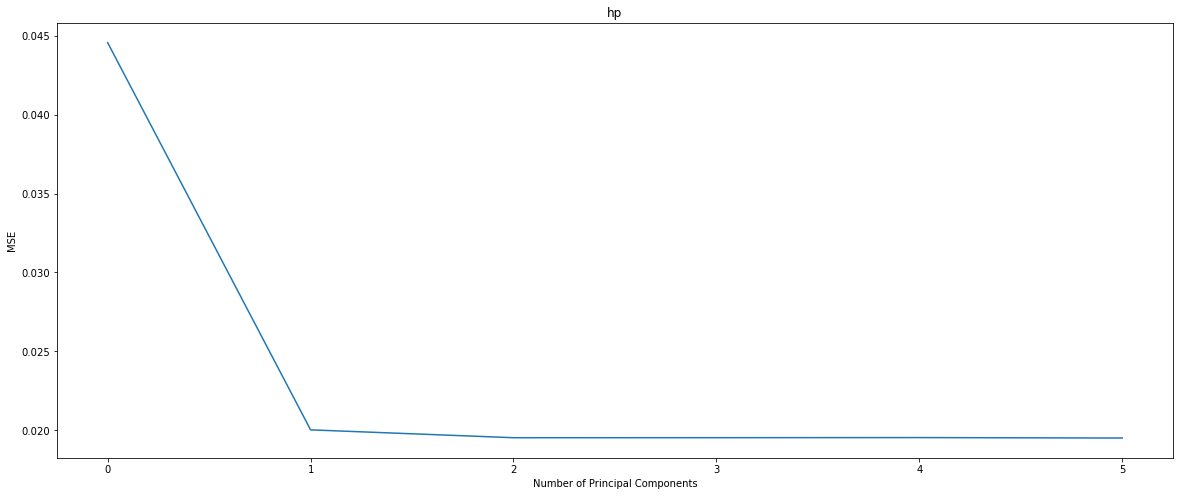

In [122]:
regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

- The plot displays the number of principal components along the x-axis and the test MSE (mean squared error) along the y-axis
- From the plot we can see that the test MSE decreases by adding in two principal components, yet it begins to decreases as we add more than two principal components and beigns to saturate at 4 yeilding the least MSE score. 

- Thus, the optimal model includes just the first 4 principal components.

In [123]:
#percentage of variance in the response variable explained by adding in each principal component to the model
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([29.92, 42.18, 51.93, 60.7 , 68.99, 76.69, 83.52, 89.02, 94.24,
       97.47, 99.99])

- We can also use the following code to calculate the percentage of variance in the response variable explained by adding in each principal component to the model

- By using just the first principal component, we can explain 29.92% of the variation in the response variable.
- By adding in the second principal component, we can explain 42.18% of the variation in the response variable.
- By adding in the third principal component, we can explain 51.93% of the variation in the response variable.
- By adding in the fourth principal component, we can explain 60.7% of the variation in the response variable.
- At the addition of nth principal component, we can explain 100% of the variation in the response variable


In [185]:
# PCR prediction
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42) 

y_train.fillna(method='bfill',inplace=True)
y_test.fillna(method='bfill',inplace=True)

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
print("RMSE score : {}".format(np.sqrt(mean_squared_error(y_test, pred))*100))

RMSE score : 15.030085899034562


# Multiple Linear Regression

In [246]:
X_m = temp_dp[[i for i in temp_dp.columns if i not in ["AQI"]]]
y_m = temp_dp["AQI"]
train_r2_score =[]
train_mse =[]
train_rmse=[]
test_r2_score =[]
test_mse =[]
test_rmse=[]
for i in range(1,20):
    X_train,X_test,y_train,y_test = train_test_split(X_m,y_m,test_size=0.3,random_state=i) 
    y_train.fillna(method='bfill',inplace=True)
    y_test.fillna(method='bfill',inplace=True)
    sscaler = StandardScaler()
    X_trains = pd.DataFrame(sscaler.fit_transform(X_train),columns=X_train.columns)
    X_tests = pd.DataFrame(sscaler.transform(X_test),columns=X_test.columns)
    M_linear = LinearRegression()
    M_linear.fit(X_trains, y_train)

    pred = M_linear.predict(X_trains)

    train_mse.append(mean_squared_error((y_train), (pred)))

    train_rmse.append(mean_squared_error((y_train), (pred), squared=False))
    train_r2_score.append(r2_score((y_train), (pred))*100)

    # make predictions for test set
    pred = M_linear.predict(X_tests)

    # determine mse, rmse and r2
    test_mse.append(mean_squared_error((y_test), (pred)))
    test_rmse.append(mean_squared_error((y_test), (pred), squared=False))
    test_r2_score.append(r2_score((y_test), (pred))*100)

<AxesSubplot:>

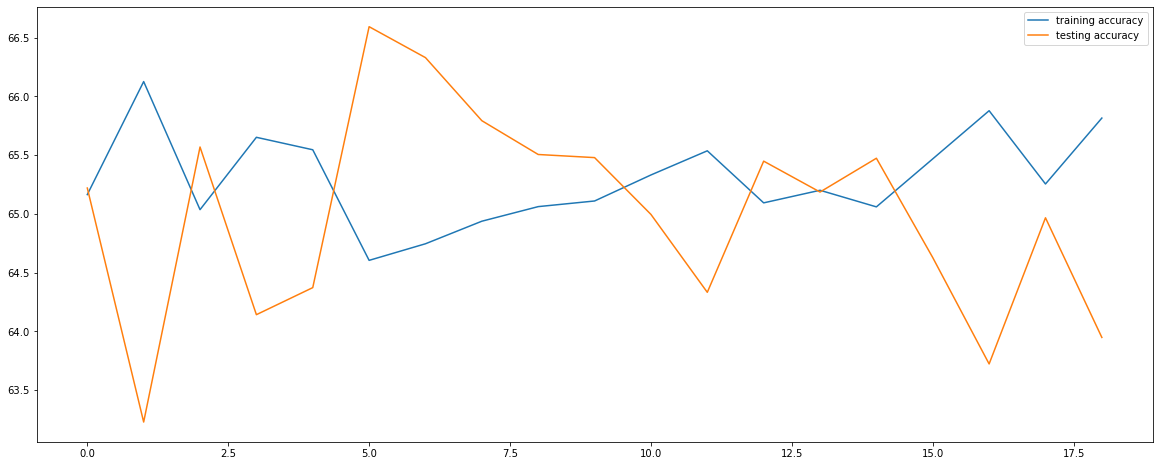

In [250]:
MLR_accuracy = pd.DataFrame([train_r2_score, test_r2_score]).T
MLR_accuracy.columns =['training accuracy','testing accuracy']
MLR_accuracy.plot(kind='line')

In [ ]:
pd.DataFrame([train_r2_score, test_r2_score]).T

In [220]:
sscaler = StandardScaler()
X_trains = pd.DataFrame(sscaler.fit_transform(X_train),columns=X_train.columns)
X_tests = pd.DataFrame(sscaler.transform(X_test),columns=X_test.columns)


display1.custom_display([X_trains.head(),X_tests.head()],['X_train','X_test'])

X_train X_test 
 
 
 PM2.5 
 PM10 
 NO 
 NO2 
 NH3 
 CO 
 SO2 
 O3 
 Benzene_binarized 
 Toluene_binarized 
 Xylene_binarized 
 
 
 
 
 -0.150670 
 0.208364 
 -1.517748 
 -0.874091 
 0.852524 
 0.158438 
 -0.670531 
 -0.391225 
 -0.090728 
 -0.249392 
 -0.055945 
 
 
 -0.331728 
 0.208364 
 0.320215 
 -0.677529 
 0.290511 
 0.568447 
 -2.058733 
 -1.006519 
 -0.090728 
 -0.249392 
 -0.055945 
 
 
 -0.692987 
 -0.979827 
 -1.925826 
 -1.713358 
 -0.945550 
 -1.027190 
 1.065128 
 0.609649 
 -0.090728 
 -0.249392 
 -0.055945 
 
 
 2.720778 
 0.208364 
 1.761132 
 0.530837 
 0.290511 
 1.272911 
 -0.167932 
 -1.018940 
 -0.090728 
 -0.249392 
 -0.055945 
 
 
 1.422980 
 0.208364 
 -0.505080 
 -1.227118 
 0.290511 
 0.300773 
 1.881272 
 1.799289 
 -0.090728 
 -0.249392 
 -0.055945 
 
 
 
 
 
 PM2.5 
 PM10 
 NO 
 NO2 
 NH3 
 CO 
 SO2 
 O3 
 Benzene_binarized 
 Toluene_binarized 
 Xylene_binarized 
 
 
 
 
 1.432867 
 0.208364 
 1.232839 
 -0.108859 
 0.290511 
 0.735885 
 -0.306340 
 -1.052690 
 -0.090728 
 -0.249392 
 -0.055945 
 
 
 1.812060 
 2.437962 
 1.914771 
 2.829045 
 1.774635 
 0.891937 
 1.085126 
 0.019474 
 -0.090728 
 -0.249392 
 -0.055945 
 
 
 -2.393861 
 -2.116598 
 -2.253343 
 -1.990257 
 -2.391415 
 -0.162726 
 -2.654273 
 -0.122159 
 -0.090728 
 -0.249392 
 -0.055945 
 
 
 0.376484 
 -0.153106 
 -0.030237 
 0.628669 
 0.868345 
 1.213640 
 -0.121173 
 0.803781 
 -0.090728 
 -0.249392 
 -0.055945 
 
 
 -0.587101 
 -1.018377 
 -2.449799 
 0.791054 
 0.290511 
 -0.409515 
 -0.189663 
 0.753954 
 -0.090728 
 -0.249392 
 -0.055945

In [239]:
M_linear = LinearRegression()
M_linear.fit(X_trains, y_train)

pred = M_linear.predict(X_trains)

print('train mse: {}'.format(mean_squared_error((y_train), (pred))))
print('train rmse: {}'.format(mean_squared_error((y_train), (pred), squared=False)))
print('train r2: {}'.format(r2_score((y_train), (pred))*100))

print()
# make predictions for test set
pred = M_linear.predict(X_tests)

# determine mse, rmse and r2
print('test mse: {}'.format(mean_squared_error((y_test), (pred))))
print('test rmse: {}'.format(mean_squared_error((y_test), (pred), squared=False)))
print('test r2: {}'.format(r2_score((y_test), (pred))*100))


train mse: 0.016341608142469283
train rmse: 0.12783429955402925
train r2: 64.51175232827822

test mse: 0.014073892016390087
test rmse: 0.11863343549096977
test r2: 66.93997156294735


In [ ]:
r2_score((y_train), (pred))*100

In [222]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X_trains, y_train)

Lasso(alpha=0.1)

In [223]:
pred = model.predict(X_trains)

print('train mse: {}'.format(mean_squared_error((y_train), (pred))))
print('train rmse: {}'.format(mean_squared_error((y_train), (pred), squared=False)))
print('train r2: {}'.format(r2_score((y_train), (pred))*100))
print()

# make predictions for test set
pred = model.predict(X_tests)

# determine mse, rmse and r2
print('test mse: {}'.format(
    mean_squared_error((y_test), (pred))))
print('test rmse: {}'.format(mean_squared_error((y_test), (pred), squared=False)))
print('test r2: {}'.format(r2_score((y_test), (pred))*100))

train mse: 0.030553455523615568
train rmse: 0.17479546768613757
train r2: 33.6485988774196

test mse: 0.027340074621438976
test rmse: 0.16534834326789905
test r2: 35.7772787084555


In [232]:
from sklearn.linear_model import Ridge
co =[]
trainr2 =[]
testr2 =[]
alphas =[0.01,0.1,0.5,1.0]
for i in alphas:
    model = Ridge(alpha=i)
    model.fit(X_trains, y_train)
    co.append(model.coef_)
    pred = model.predict(X_trains)
    print("For Alpha = {}".format(i))
    print('train mse: {}'.format(mean_squared_error((y_train), (pred))))
    print('train rmse: {}'.format(mean_squared_error((y_train), (pred), squared=False)))
    print('train r2: {}'.format(r2_score((y_train), (pred))*100))
    trainr2.append({"r2_score": r2_score((y_train), (pred))*100})
    print()

    # make predictions for test set
    pred = model.predict(X_tests)

    # determine mse, rmse and r2
    print('test mse: {}'.format(mean_squared_error((y_test), (pred))))
    print('test rmse: {}'.format(mean_squared_error((y_test), (pred), squared=False)))
    print('test r2: {}'.format(r2_score((y_test), (pred))*100))
    testr2.append({"r2_score": r2_score((y_test), (pred))*100})
    

For Alpha = 0.01
train mse: 0.01634160814247306
train rmse: 0.12783429955404402
train r2: 64.51175232827

test mse: 0.01407389179191695
test rmse: 0.11863343454489106
test r2: 66.93997209024202
For Alpha = 0.1
train mse: 0.01634160814284723
train rmse: 0.1278342995555075
train r2: 64.51175232745744

test mse: 0.014073889771975412
test rmse: 0.11863342603151698
test r2: 66.93997683515016
For Alpha = 0.5
train mse: 0.016341608151917257
train rmse: 0.12783429959098325
train r2: 64.51175230776052

test mse: 0.014073880801353683
test rmse: 0.11863338822335677
test r2: 66.9399979074313
For Alpha = 1.0
train mse: 0.016341608180257615
train rmse: 0.12783429970183124
train r2: 64.5117522462152

test mse: 0.014073869603906816
test rmse: 0.11863334102985895
test r2: 66.94002421059689


In [234]:
trainr2

[{'r2_score': 64.51175232827},
 {'r2_score': 64.51175232745744},
 {'r2_score': 64.51175230776052},
 {'r2_score': 64.5117522462152}]

# SVM Regression

In [213]:
X_s = temp_dp[[i for i in temp_dp.columns if i not in ["AQI"]]]
y_s = temp_dp["AQI"]
X_train,X_test,y_train,y_test = train_test_split(X_s,y_s,test_size=0.3,random_state=42) 

In [214]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_sv = sc_X.fit_transform(X_train)
X_test_sv = sc_X.fit_transform(X_test)
y_train_sv = sc_y.fit_transform(y_train.to_numpy().reshape(-1,1))
y_test_sv = sc_y.fit_transform(y_test.to_numpy().reshape(-1,1))

In [215]:
len(X_train_sv),len(y_train_sv), len(X_test_sv),len(y_test_sv)

(19230, 19230, 8242, 8242)

In [216]:
regressor = SVR(kernel = 'rbf')
svr = regressor.fit(X_train_sv, np.ravel(y_train_sv))
y_pred = svr.predict(X_train_sv)

In [217]:
score = svr.score(X_train_sv,y_train_sv)
print("R-squared:", score*100)
print("MSE:", mean_squared_error(y_train_sv, y_pred))

R-squared: 84.20685236633561
MSE: 0.1579314763366438


In [236]:
print()

0.8420685236633562